## **Import Library**

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## **Import Dataset**

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
path = '/content/drive/MyDrive/cs345_data/used_cars_data.csv'
used_cars = pd.read_csv(path)

In [197]:
used_cars

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [181]:
print(f'rows {used_cars.shape[0]} columns {used_cars.shape[1]} ')

rows 7253 columns 14 


In [198]:
#Mileage
used_cars["Mileage"] = used_cars["Mileage"].str.replace(r"([kmpl/g])", "").astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [199]:
#Power
used_cars["Power"] = used_cars["Power"] .replace("null bhp", 0)
used_cars["Power"] = used_cars["Power"].str.replace(r"([ bph])", "").astype("float")

mean_power = used_cars[used_cars["Power"] != 0]
used_cars['Power'] = used_cars["Power"].replace(0, mean_power["Power"].mean())
used_cars['Power'].fillna(mean_power["Power"].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
#New Price
used_cars["New_Price"] = used_cars["New_Price"].str.replace(r"([LakhCr])", "").astype("float")
used_cars["New_Price"].fillna(0, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [201]:
#Seat
used_cars['Seats'].fillna(used_cars["Seats"].mean(), inplace = True)

In [202]:
#Engine
used_cars["Engine"] = used_cars["Engine"].str.replace(r"([CC])", "").astype("float")
used_cars['Engine'].fillna(used_cars["Engine"].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [203]:
#Drop New Price
used_cars = used_cars.drop(columns = ["New_Price"])

In [204]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


In [205]:
data = used_cars.copy()

In [176]:
#Drop null values of Price Column
used_cars = used_cars[used_cars["Price"].notna()]

In [177]:
#Rename Columns
used_cars = used_cars.rename(columns = {"Mileage": "Mileage kmpl/kg",
                                        "Engine": "Engine CC",
                                        "Power": "Power bph"})

## **Cleaning Data**

In [178]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage kmpl/kg    6017 non-null   float64
 9   Engine CC          6019 non-null   float64
 10  Power bph          6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


In [18]:
used_cars.describe()

,S.No.,Year,Kilometers_Driven,Mileage kmpl/kg,Engine CC,Power bph,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6017.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.248321,113.241460,5.278742,9.479468
std,1737.679967,3.269742,9.126884e+04,4.582289,599.553975,53.231071,0.806012,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


## **Top 10 cars**

In [ ]:
topcars = used_cars["Name"].value_counts().to_frame().reset_index().head(10)
topcars.columns = ["Cars", "Frequency" ]
topcars

,Cars,Frequency
0,Mahindra XUV500 W8 2WD,49
1,Maruti Swift VDI,45
2,Honda City 1.5 S MT,34
3,Maruti Swift Dzire VDI,34
4,Maruti Swift VDI BSIV,31
5,Maruti Ritz VDi,30
6,Hyundai i10 Sportz,30
7,Toyota Fortuner 3.0 Diesel,29
8,Honda Amaze S i-Dtech,27
9,Hyundai Grand i10 Sportz,27


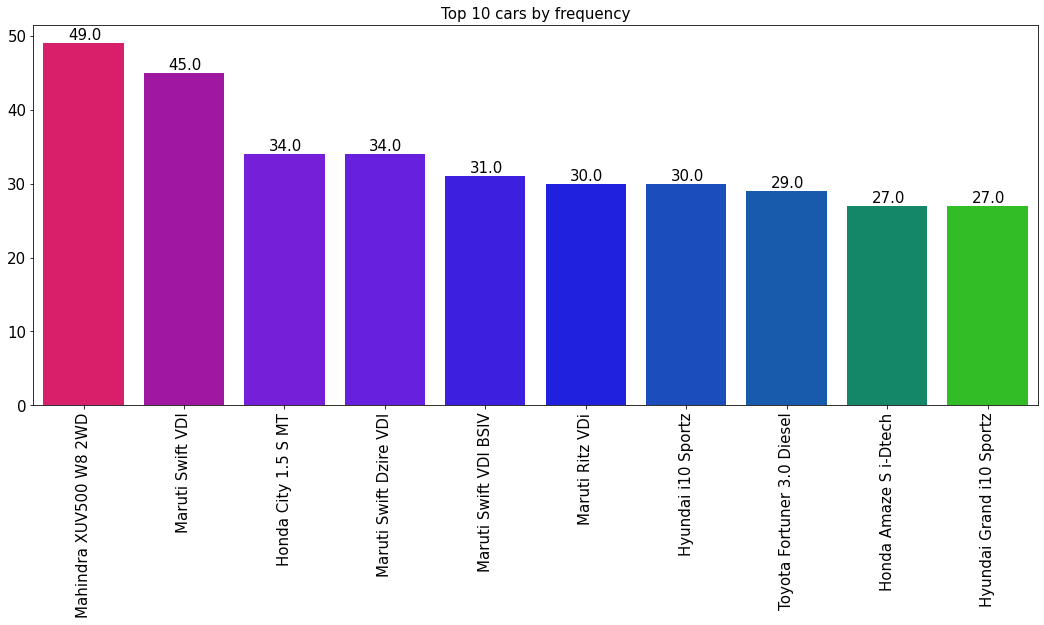

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Cars", y = "Frequency", data = topcars, palette = "prism")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.41, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 10 cars by frequency", size = 15)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **จำนวนการขายรถของแต่ละ Location**

In [ ]:
city = used_cars["Location"].value_counts().reset_index()
city.columns = ["City", "Cars"]
city

,City,Cars
0,Mumbai,790
1,Hyderabad,742
2,Kochi,651
3,Coimbatore,636
4,Pune,622
5,Delhi,554
6,Kolkata,535
7,Chennai,494
8,Jaipur,413
9,Bangalore,358


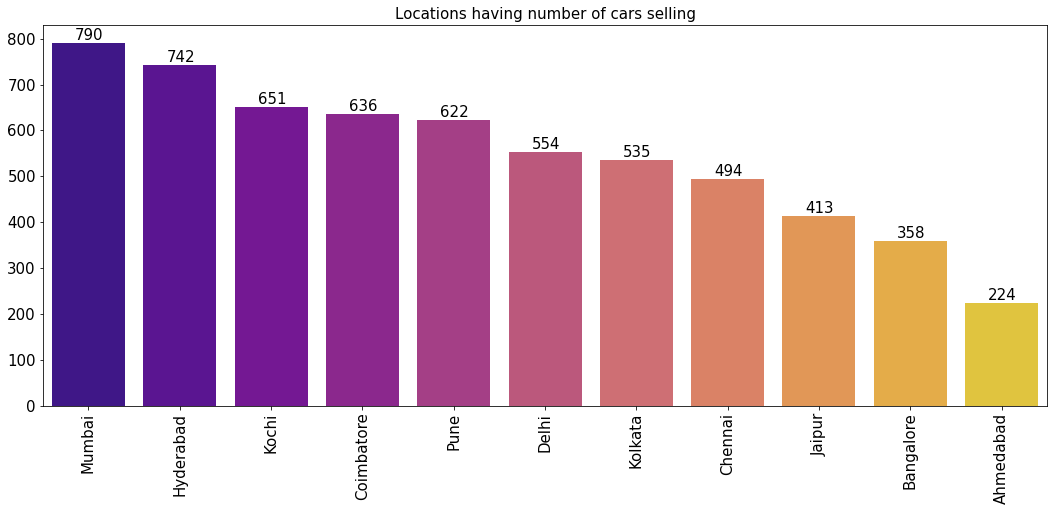

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "City", y = "Cars", data = city, palette = "plasma")
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Locations having number of cars selling", size =15)
plt.xticks(size = 15, rotation =90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **จำนวนของการขายรถในแต่ละปี**

In [ ]:
years = used_cars["Year"].value_counts().to_frame().reset_index()
years.columns = ["Years", "Cars"]
years

,Years,Cars
0,2014,797
1,2015,744
2,2016,741
3,2013,649
4,2017,587
5,2012,580
6,2011,466
7,2010,342
8,2018,298
9,2009,198


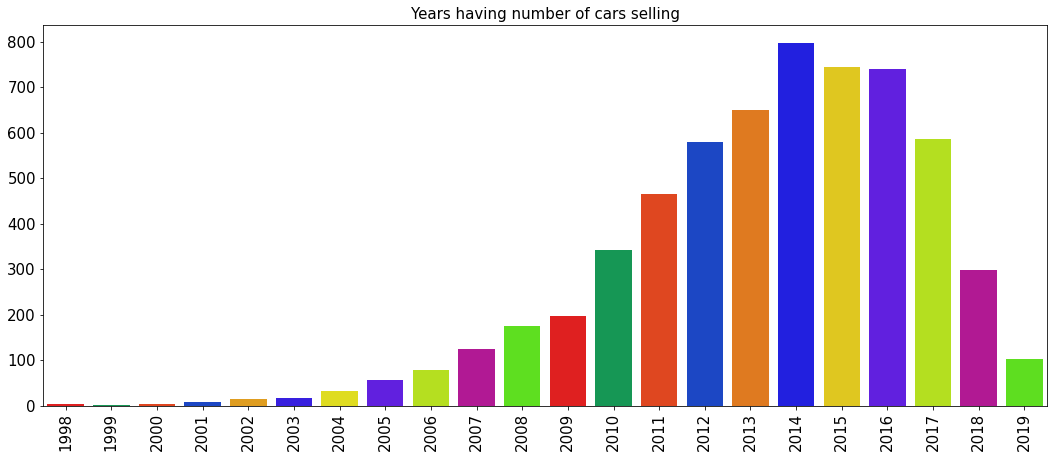

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Years", y = "Cars", data = years,  palette ="prism_r")
for p in graph.patches:
          graph.annotate('{:.0f}'.format(p.get_height()),
                                (p.get_x()+0.41, p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Years having number of cars selling", size = 15)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **ระยะทางสะสมของรถ**

In [ ]:
driven = used_cars["Kilometers_Driven"].value_counts().to_frame().reset_index().head(10)
driven.columns = ["Kilometers Driven", "Cars"]
driven

,Kilometers Driven,Cars
0,60000,82
1,45000,70
2,65000,68
3,50000,61
4,55000,60
5,70000,60
6,30000,54
7,52000,54
8,80000,50
9,75000,50


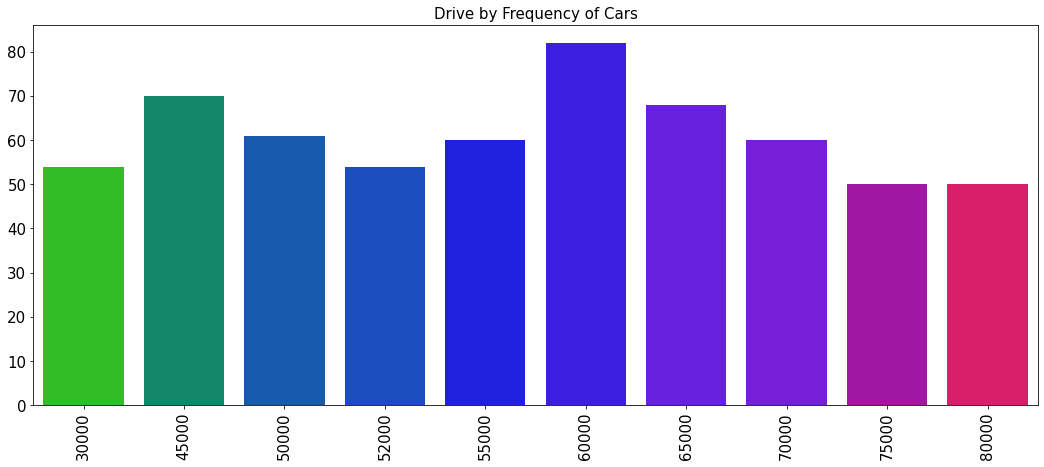

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Kilometers Driven", y = "Cars", data = driven,  palette ="prism_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.41, p.get_height()),ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Drive by Frequency of Cars", size = 15)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **ประเภทของการใช้เชื้อเพลิง**

In [ ]:
fuel_cars = used_cars["Fuel_Type"].value_counts().to_frame().reset_index()
fuel_cars.columns = ["Fuel Type", "Cars"]
fuel_cars

,Fuel Type,Cars
0,Diesel,3205
1,Petrol,2746
2,CNG,56
3,LPG,10
4,Electric,2


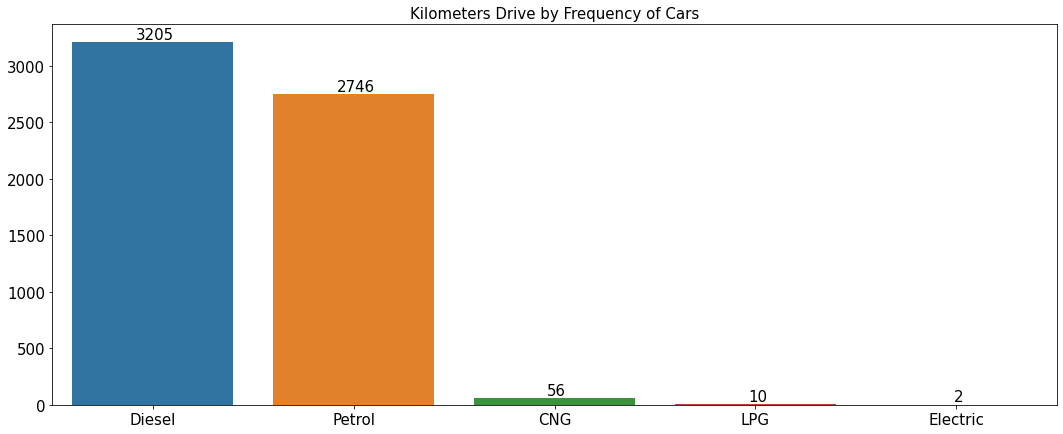

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel Type", y = "Cars", data = fuel_cars)
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Kilometers Drive by Frequency of Cars", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **ประเภทของเกียร์รถยนต์**

In [ ]:
transmission_cars = used_cars["Transmission"].value_counts().to_frame().reset_index()
transmission_cars.columns = ["Transmission Type", "Cars"]
transmission_cars

,Transmission Type,Cars
0,Manual,4299
1,Automatic,1720


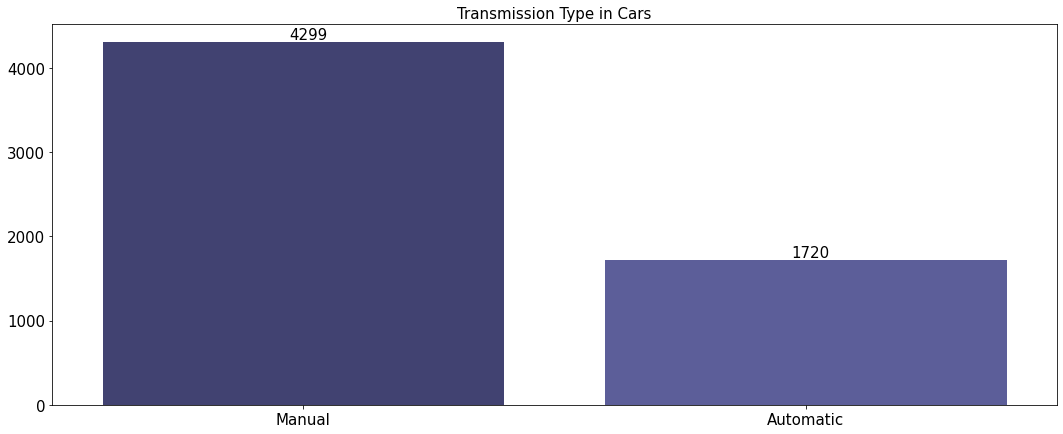

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission Type", y = "Cars", data = transmission_cars, palette = "tab20b")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Transmission Type in Cars", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **จำนวนของรถตามประเภทเจ้าของ**

In [ ]:
cars_owner = used_cars["Owner_Type"].value_counts().to_frame().reset_index()
cars_owner.columns = ["Owner", "Cars"]
cars_owner

,Owner,Cars
0,First,4929
1,Second,968
2,Third,113
3,Fourth & Above,9


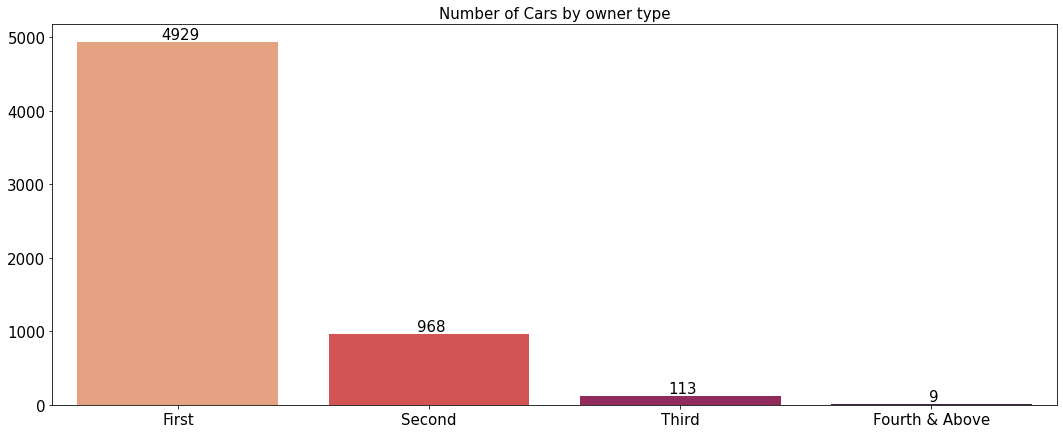

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "Cars", data = cars_owner, palette = "rocket_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Number of Cars by owner type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage kmpl/kg    6017 non-null   float64
 9   Engine CC          6019 non-null   float64
 10  Power bph          6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


# **จำนวนรถสูงสุดตามระยะทาง**

In [ ]:
mileage_cars = used_cars["Mileage kmpl/kg"].value_counts().to_frame().reset_index().head(10)
mileage_cars.columns = ["Mileage", "Cars"]
mileage_cars

,Mileage,Cars
0,17.00,173
1,18.90,172
2,18.60,119
3,20.36,88
4,21.10,87
5,17.80,85
6,16.00,76
7,12.80,72
8,20.00,71
9,18.00,69


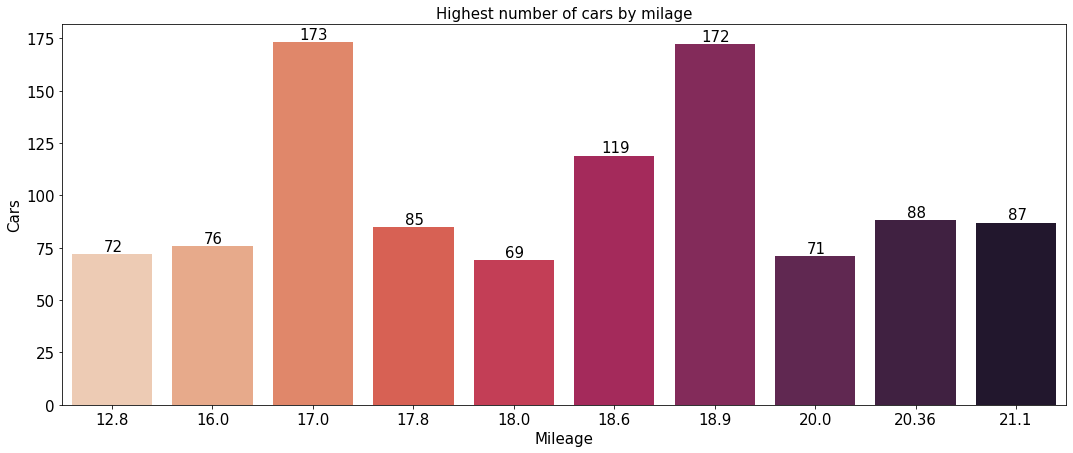

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Mileage", y = "Cars", data = mileage_cars, palette = "rocket_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Highest number of cars by milage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Mileage", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

#**แสดงจำนวนรถโดยอิงจากวิ่งระยะทางเป็นไมล์ที่สูงสุด**

In [ ]:
highest_mileage = used_cars["Mileage kmpl/kg"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
highest_mileage.columns = ["Mileage", "Cars"]
highest_mileage

,Mileage,Cars
228,33.54,5
273,33.44,4
326,32.26,2
327,31.79,2
380,30.46,1
35,28.40,40
66,28.09,28
265,27.62,4
271,27.40,4
140,27.39,13


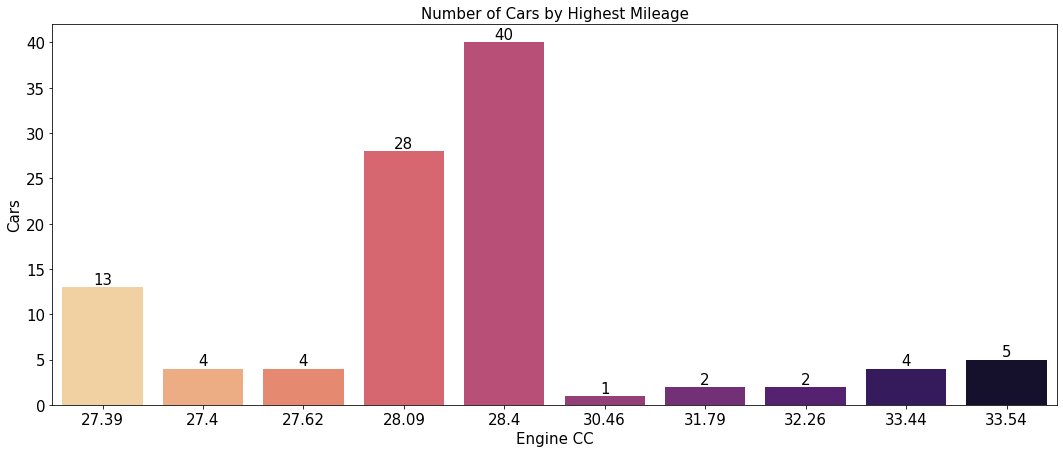

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Mileage", y = "Cars", data = highest_mileage, palette = "magma_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Number of Cars by Highest Mileage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Engine CC", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

#**แสดงจำนวนรถยนต์ที่มีมากในระดับ **CC**** **เดียวกัน 10 อันดับแรก**

In [ ]:
hi_engine = used_cars["Engine CC"].value_counts().to_frame().reset_index().head(10)
hi_engine.columns = ["Engine CC", "Cars"]
hi_engine

,Engine CC,Cars
0,1197.0,606
1,1248.0,512
2,1498.0,304
3,998.0,259
4,2179.0,240
5,1497.0,229
6,1198.0,227
7,1968.0,216
8,1995.0,183
9,1461.0,152


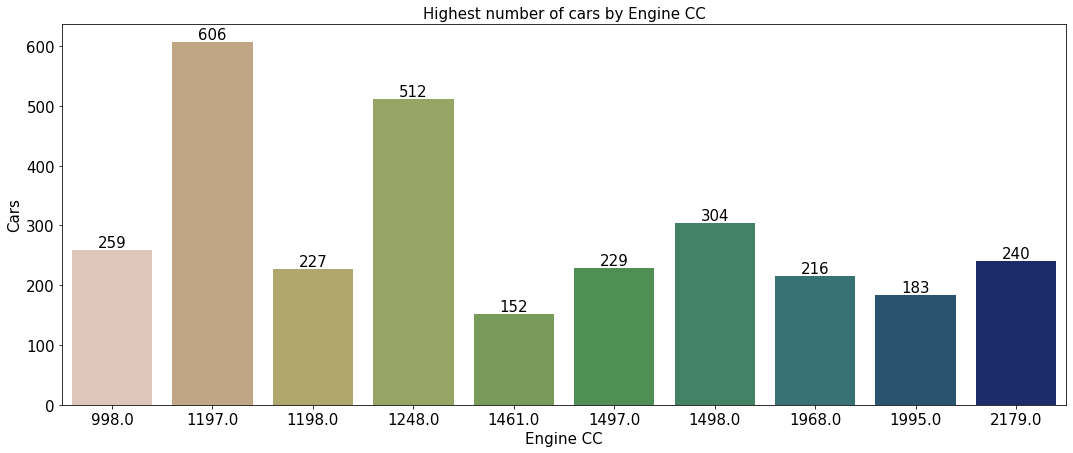

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Engine CC", y = "Cars", data = hi_engine, palette = "gist_earth_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Highest number of cars by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Engine CC", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

# **แสดงจำนวนรถยนต์ที่มีระดับ CC ที่สูงสุด 10 อันดับแรก**

In [ ]:
engine = used_cars["Engine CC"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
engine.columns = ["Engine CC", "Cars"]
engine

,Engine CC,Cars
126,5998.0,1
104,5461.0,3
129,5204.0,1
115,5000.0,2
121,4951.0,1
98,4806.0,4
107,4395.0,3
89,4367.0,5
79,4134.0,8
111,3597.0,2


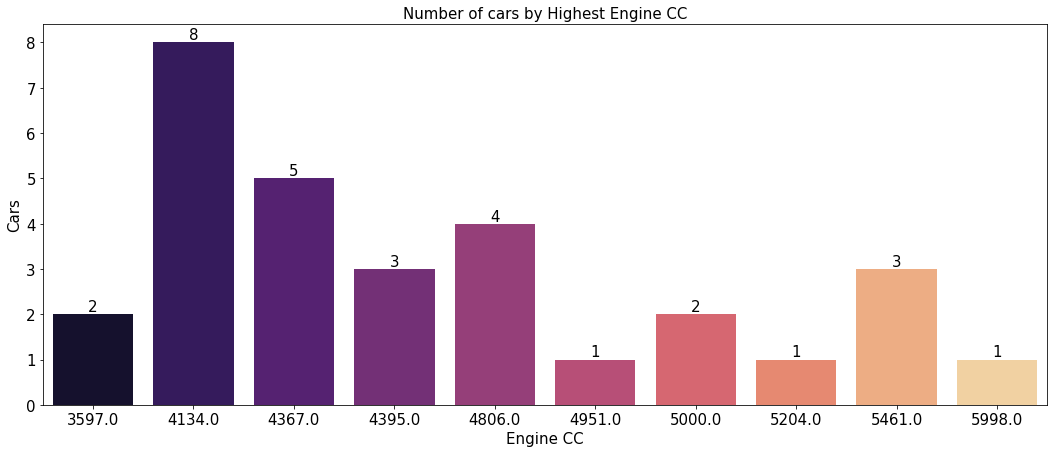

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Engine CC", y = "Cars", data = engine, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Number of cars by Highest Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Engine CC", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

# **แสดงจำนวนรถยนต์ที่มีมากในระดับแรงม้าเดียวกัน 10 อันดับแรก**

In [ ]:
power = used_cars["Power bph"].value_counts().to_frame().reset_index()
power.columns = ["Power bph", "Cars"]
power = power.head(10)
power

,Power bph,Cars
0,74.000000,235
1,112.765214,143
2,98.600000,131
3,73.900000,125
4,140.000000,123
5,88.500000,112
6,78.900000,111
7,67.100000,107
8,67.040000,107
9,82.000000,101


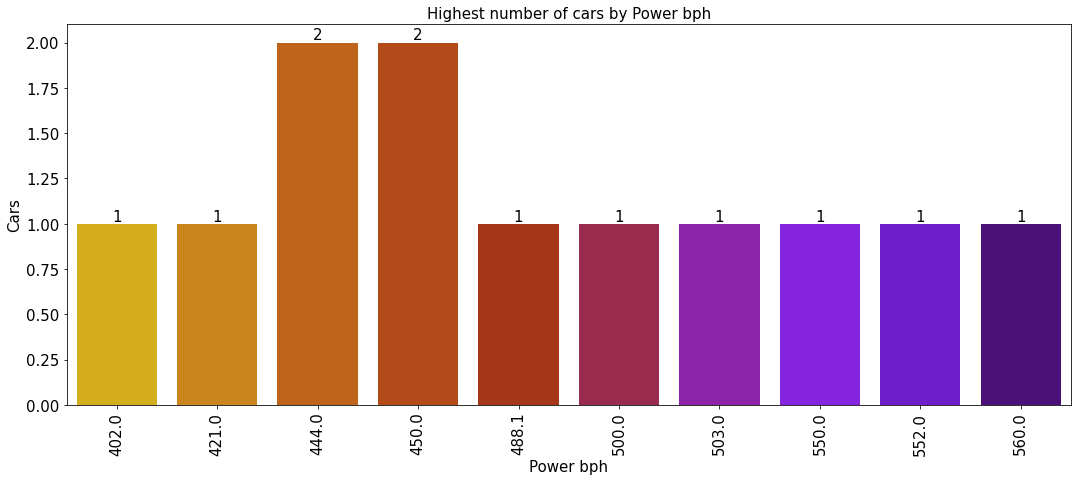

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Power bph", y = "Cars", data = power, palette = "gnuplot_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Highest number of cars by Power bph", size = 15)
plt.xticks(size = 15,rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Power bph", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

# **แสดงจำนวนรถยนต์ที่มีระดับแรงม้าที่สูงสุด 10 อันดับแรก**

In [ ]:
power = used_cars["Power bph"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
power.columns = ["Power bph", "Cars"]
power

,Power bph,Cars
328,560.0,1
321,552.0,1
349,550.0,1
325,503.0,1
323,500.0,1
309,488.1,1
263,450.0,2
287,444.0,2
311,421.0,1
359,402.0,1


# **แสดงจำนวนรถยนต์ที่มีมากในจำนวนที่นั่งเหมือนกัน 10 อันดับแรก**

In [ ]:
seats = used_cars["Seats"].value_counts().to_frame().reset_index().head(10)
seats.columns = ["Seats", "Cars"]
seats

,Seats,Cars
0,5.000000,5014
1,7.000000,674
2,8.000000,134
3,4.000000,99
4,5.279722,42
5,6.000000,31
6,2.000000,16
7,10.000000,5
8,9.000000,3
9,0.000000,1


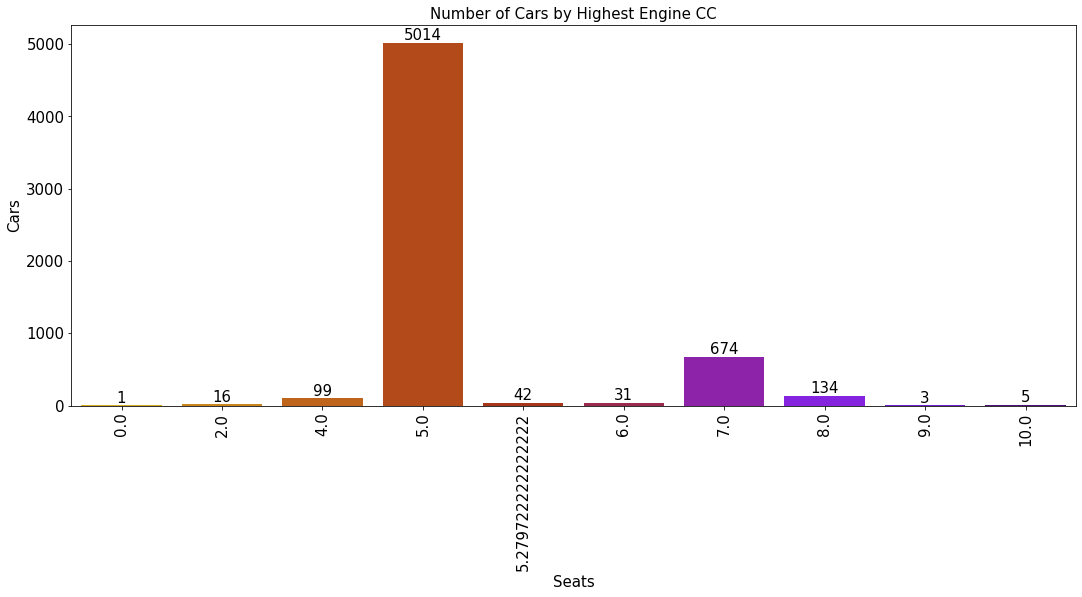

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Seats", y = "Cars", data = seats, palette = "gnuplot_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Number of Cars by Highest Engine CC", size = 15)
plt.xticks(size = 15,rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Seats", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

# **แสดงจำนวนรถยนต์ที่มีมากในราคาระดับเดียวกัน 10 อันดับแรก**

In [ ]:
price = used_cars["Price"].value_counts().to_frame().reset_index().head(10)
price.columns = ["Price (Lakhs)", "Cars"]
price

,Price (Lakhs),Cars
0,4.50,88
1,5.50,84
2,3.50,82
3,4.25,73
4,3.25,71
5,3.00,68
6,6.50,64
7,2.50,63
8,4.00,56
9,4.75,53


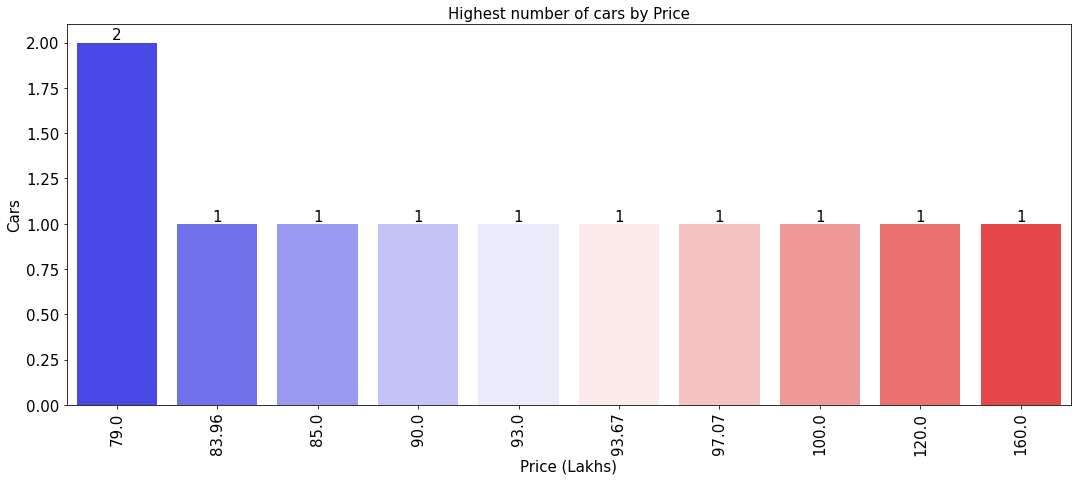

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Price (Lakhs)", y = "Cars", data = price, palette = "bwr")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Highest number of cars by Price", size = 15)
plt.xticks(size = 15,rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Price (Lakhs)", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

# **แสดงจำนวนรถยนต์ที่มีราคาที่สูงสุด 10 อันดับแรก**

In [ ]:
price = used_cars["Price"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
price.columns = ["Price (Lakhs)", "Cars"]
price

,Price (Lakhs),Cars
877,160.00,1
887,120.00,1
671,100.00,1
1166,97.07,1
1360,93.67,1
1362,93.00,1
841,90.00,1
814,85.00,1
1350,83.96,1
410,79.00,2


# **วิเคราะห์เบื้องลึก**

In [ ]:
used_cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage kmpl/kg,Engine CC,Power bph,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# **แสดงจำนวนรถรุ่นเดียวที่มีวางขายในรัฐเป็นจำนวนมากที่สุด 10 อันดับ**

In [ ]:
nl = used_cars.groupby(["Location","Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "count",ascending = False)
nl = nl.drop_duplicates("Location",keep ="first")
nl.columns = ["City", "Car Model" , "Cars"]
nl

,City,Car Model,Cars
1950,Hyderabad,Maruti Ritz VDi,12
3152,Kolkata,Maruti Swift Dzire VDI,9
1474,Delhi,Mahindra XUV500 W8 2WD,9
1003,Coimbatore,Hyundai Grand i10 AT Asta,8
4102,Pune,Maruti Swift VDI,8
2715,Kochi,Mahindra XUV500 W8 2WD,8
2220,Jaipur,Hyundai EON Era Plus,7
3743,Mumbai,Skoda Superb Elegance 1.8 TSI AT,7
188,Bangalore,Audi A4 2.0 TDI 177 Bhp Premium Plus,5
717,Chennai,Maruti Swift VDI,5


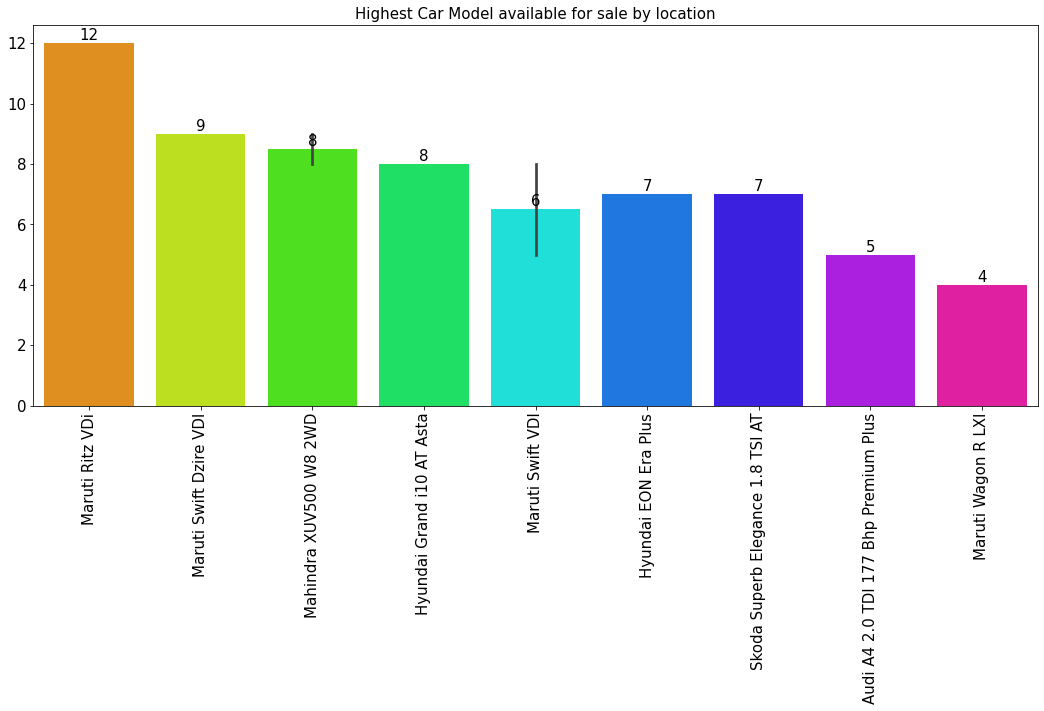

In [ ]:
plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Car Model", y = "Cars", data = nl, palette = "hsv")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center',va='bottom',color= 'black',size = 15)
plt.title("Highest Car Model available for sale by location", size = 15)
plt.xticks(size = 15, rotation =90)
plt.yticks(size =15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถรุ่นเดียวกันที่มีในปีวางขายเป็นจำนวนมากที่สุด 10 อันดับ**

In [ ]:
cy = used_cars.groupby(["Year" ,"Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "count",ascending = False)
cy = cy.drop_duplicates("Year", keep = "first")
cy.columns = ["Year", "Car Model", "Cars"]
cy

,Year,Car Model,Cars
2035,2014,Maruti Swift VDI,14
1265,2012,Maruti Swift VDI,12
3029,2016,Renault KWID RXT,12
1573,2013,Mahindra XUV500 W8 2WD,11
837,2011,Honda City 1.5 S MT,10
754,2010,Toyota Fortuner 3.0 Diesel,9
452,2009,Honda City 1.5 S MT,9
2483,2015,Maruti Swift Dzire VDI,9
3387,2017,Maruti Vitara Brezza ZDi Plus Dual Tone,7
3685,2018,Mercedes-Benz New C-Class C 220d Avantgarde Ed...,7


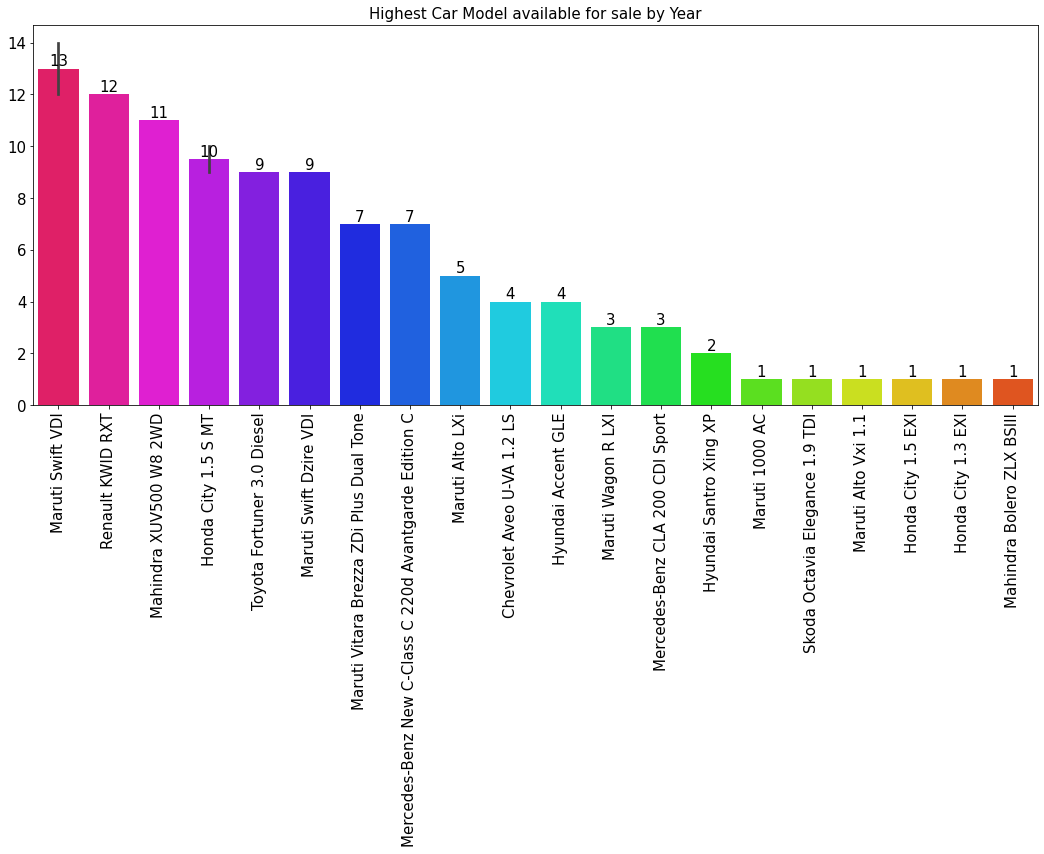

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Car Model", y = "Cars", data = cy, palette = "hsv_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center',va='bottom',color= 'black',size = 15)
plt.title("Highest Car Model available for sale by Year", size = 15)
plt.xticks(size = 15, rotation =90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถที่วางขายที่วิ่งน้อยที่สุด**

In [ ]:
kd = used_cars.groupby(["Kilometers_Driven", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Kilometers_Driven")
kd = kd.drop_duplicates("Name", keep = "first")
kd.columns = ["Kilometers_Driven", "Car Model", "Cars"]
kd = kd.head(10)
kd

,Kilometers_Driven,Car Model,Cars
0,171,Maruti Alto 800 2016-2019 VXI,1
1,600,Maruti Wagon R ZXI AMT 1.2,1
10,1000,Volkswagen Polo 1.0 MPI Trendline,1
8,1000,Tata Tigor 1.2 Revotron XTA,1
7,1000,Renault KWID RXL,1
6,1000,Maruti Ignis 1.2 Alpha,1
9,1000,Tata Xenon XT EX 4X2,1
4,1000,Hyundai i20 Active SX Dual Tone Petrol,1
3,1000,Hyundai Grand i10 1.2 Kappa Asta,1
2,1000,Ford Figo 2015-2019 1.2P Sports Edition MT,1


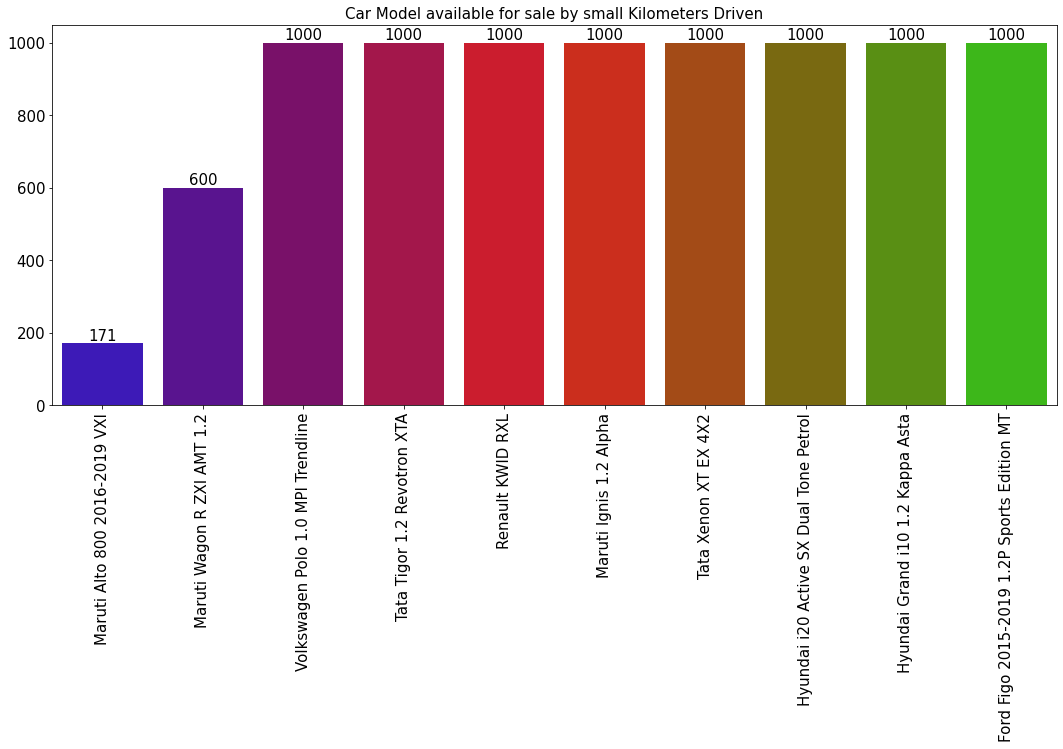

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Car Model", y = "Kilometers_Driven", data = kd, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center', va='bottom',color= 'black', size =15)
plt.title("Car Model available for sale by small Kilometers Driven", size = 15)
plt.xticks(size = 15, rotation =90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถรุ่นเดียวกันโดยอิงจากวิ่งระยะทางเป็นไมล์ที่สูงสุด**

In [ ]:
cm = used_cars.groupby(["Mileage kmpl/kg", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Mileage kmpl/kg",ascending = False)
cm = cm.drop_duplicates("Name", keep = "first")
cm.columns = ["Mileage kmpl/kg", "Car Model", "Cars"]
cm = cm.head(10)
cm

,Mileage kmpl/kg,Car Model,Cars
1963,33.54,Maruti Wagon R CNG LXI,5
1962,33.44,Maruti Alto 800 2016-2019 CNG LXI,4
1961,32.26,Maruti Alto K10 LXI CNG Optional,1
1960,32.26,Maruti Alto K10 LXI CNG,1
1959,31.79,Maruti Celerio CNG VXI MT,2
1958,30.46,Maruti Alto 800 CNG LXI,1
1951,28.40,Maruti Swift AMT DDiS VDI,1
1945,28.40,Maruti Dzire AMT VDI,1
1946,28.40,Maruti Dzire AMT ZDI Plus,4
1947,28.40,Maruti Dzire LDI,3


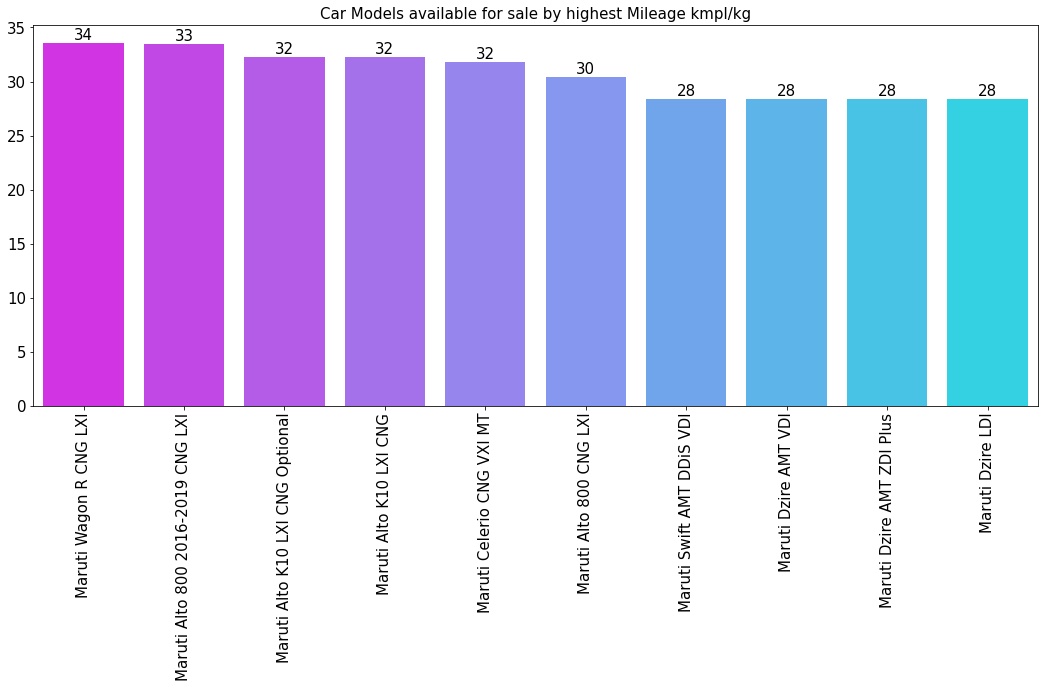

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Car Model", y = "Mileage kmpl/kg", data = cm, palette = "cool_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car Models available for sale by highest Mileage kmpl/kg", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถรุ่นเดียวกันที่วางขาย ระดับ CC ที่สูงสุด**

In [ ]:
ce = used_cars.groupby(["Engine CC", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Engine CC",ascending = False)
ce = ce.drop_duplicates("Name", keep = "first")
ce.columns = ["Engine CC", "Car Model", "Cars"]
ce = ce.head(10)
ce

,Engine CC,Car Model,Cars
1887,5998.0,Bentley Continental Flying Spur,1
1886,5461.0,Mercedes-Benz SLK-Class 55 AMG,1
1885,5461.0,Mercedes-Benz SL-Class SL 500,1
1884,5461.0,Mercedes-Benz S Class 2005 2013 S 500,1
1883,5204.0,Lamborghini Gallardo Coupe,1
1882,5000.0,Jaguar XJ 5.0 L V8 Supercharged,1
1881,5000.0,Jaguar F Type 5.0 V8 S,1
1880,4951.0,Ford Mustang V8,1
1879,4806.0,Porsche Panamera 2010 2013 Diesel,1
1878,4806.0,Porsche Panamera 2010 2013 4S,1


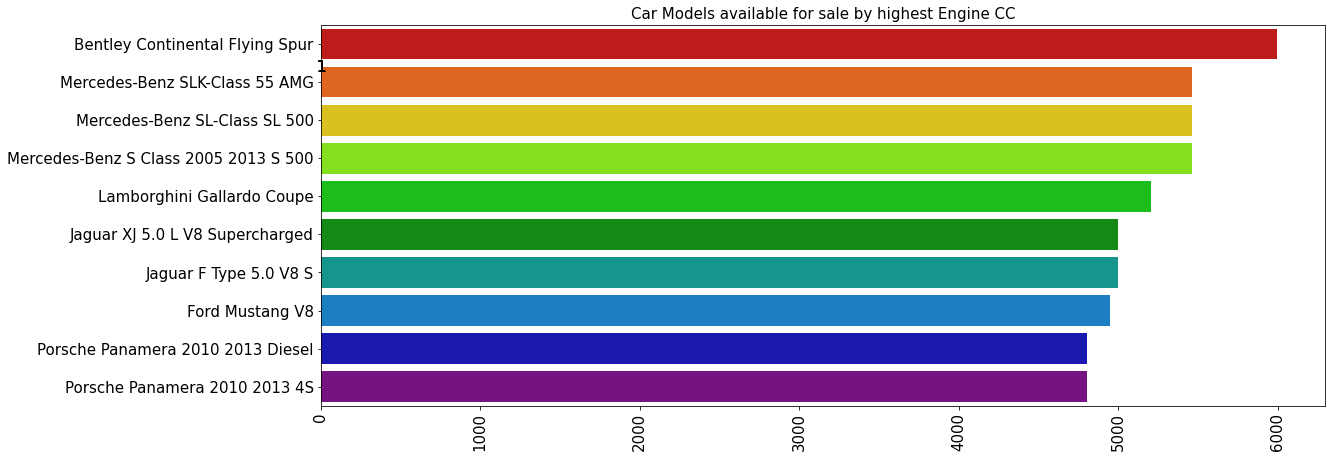

In [ ]:
plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Engine CC", y = "Car Model", data = ce, palette = "nipy_spectral_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x(), p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car Models available for sale by highest Engine CC", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **จำนวนรุ่นรถที่มีขายตามกำลังแรงม้าสูงสุด**

In [ ]:
cp = used_cars.groupby(["Power bph", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Power bph",ascending = False)
cp = cp.drop_duplicates("Name", keep = "first")
cp.columns = ["Power bph", "Car Model", "Cars"]
cp = cp.head(10)
cp

,Power bph,Car Model,Cars
1967,560.0,Lamborghini Gallardo Coupe,1
1966,552.0,Bentley Continental Flying Spur,1
1965,550.0,Porsche Cayenne Turbo S,1
1964,503.0,Jaguar XJ 5.0 L V8 Supercharged,1
1963,500.0,Porsche Cayenne 2009-2014 Turbo,1
1962,488.1,Jaguar F Type 5.0 V8 S,1
1961,450.0,BMW 6 Series 650i Coupe,1
1960,450.0,BMW 6 Series 630i Coupe,1
1959,444.0,Audi RS5 Coupe,2
1958,421.0,Mercedes-Benz SLK-Class 55 AMG,1


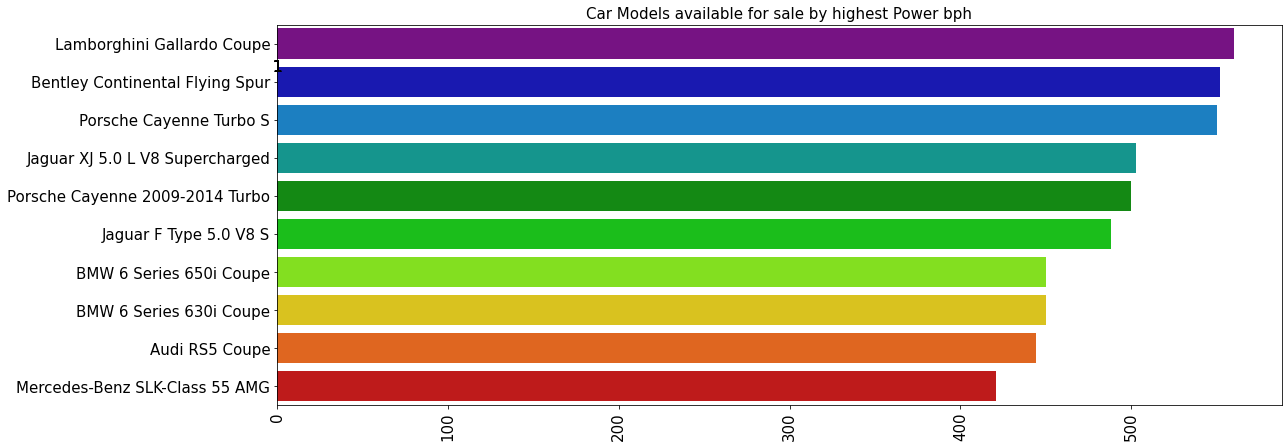

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Power bph", y = "Car Model", data = cp, palette = "nipy_spectral")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car Models available for sale by highest Power bph", size = 15)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **จำนวนรุ่นรถที่มีขายตามที่นั่งสูงสุด**

In [ ]:
cs = used_cars.groupby(["Seats", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Seats",ascending = False)
cs = cs.drop_duplicates("Name", keep = "first")
cs.columns = ["Seats", "Car Model", "Cars"]
cs = cs.head(10)
cs

,Seats,Car Model,Cars
1882,10.0,Toyota Qualis RS E2,1
1881,10.0,Toyota Qualis FS B3,1
1880,10.0,Toyota Qualis FS B2,1
1879,10.0,Tata Sumo DX,1
1878,10.0,Chevrolet Tavera LS B3 10 Seats BSIII,1
1877,9.0,Mahindra Xylo D2 Maxx,1
1876,9.0,Mahindra Scorpio LX BS IV,1
1875,9.0,Chevrolet Tavera LT 9 Str BS IV,1
1840,8.0,Mahindra Scorpio VLX 4WD,1
1835,8.0,Mahindra Scorpio VLX 2.2 mHawk BSIII,2


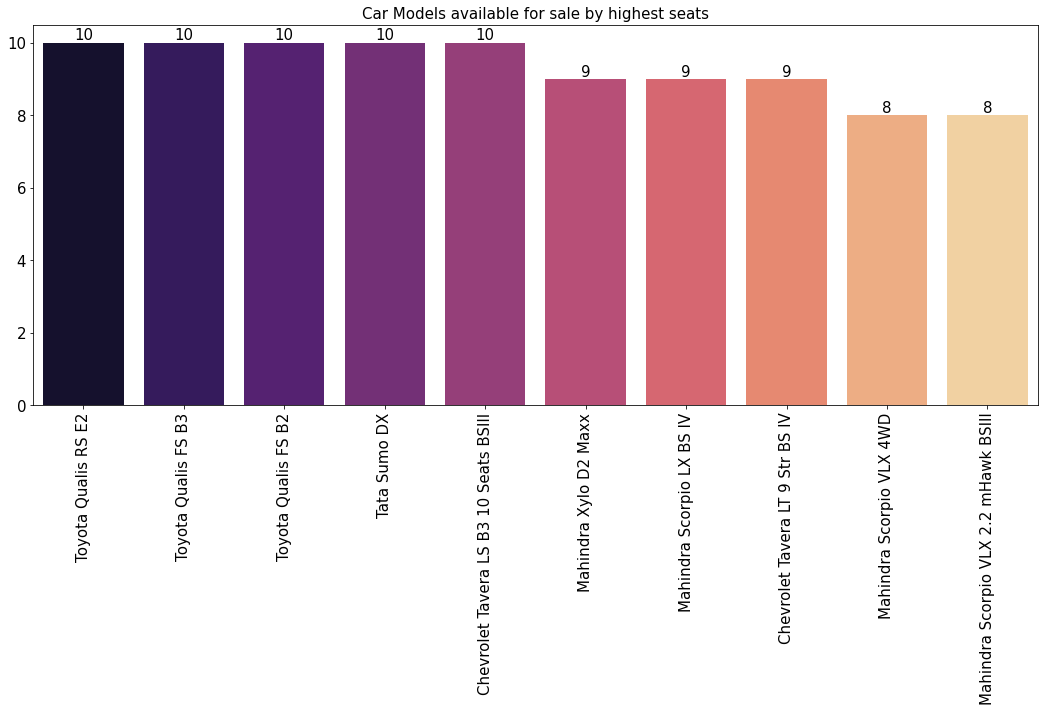

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Car Model", y = "Seats", data = cs, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car Models available for sale by highest seats", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **จำนวนรุ่นรถที่มีขายตามราคาที่สูงสุด**

In [ ]:
cp = used_cars.groupby(["Price", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by= "Price",ascending = False)
cp = cp.drop_duplicates("Name", keep = "first")
cp.columns = ["Price" ,"Car Model", "Cars"]
cp = cp.head(10)
cp

,Price,Car Model,Cars
5744,160.00,Land Rover Range Rover 3.0 Diesel LWB Vogue,1
5743,120.00,Lamborghini Gallardo Coupe,1
5742,100.00,Jaguar F Type 5.0 V8 S,1
5741,97.07,Land Rover Range Rover Sport SE,1
5740,93.67,BMW 7 Series 740Li,1
5738,90.00,Mercedes-Benz SLK-Class 55 AMG,1
5737,85.00,BMW X6 xDrive 40d M Sport,1
5736,83.96,Mercedes-Benz SLC 43 AMG,1
5734,79.00,Jaguar XJ 3.0L Portfolio,1
5735,79.00,Mercedes-Benz GLS 350d Grand Edition,1


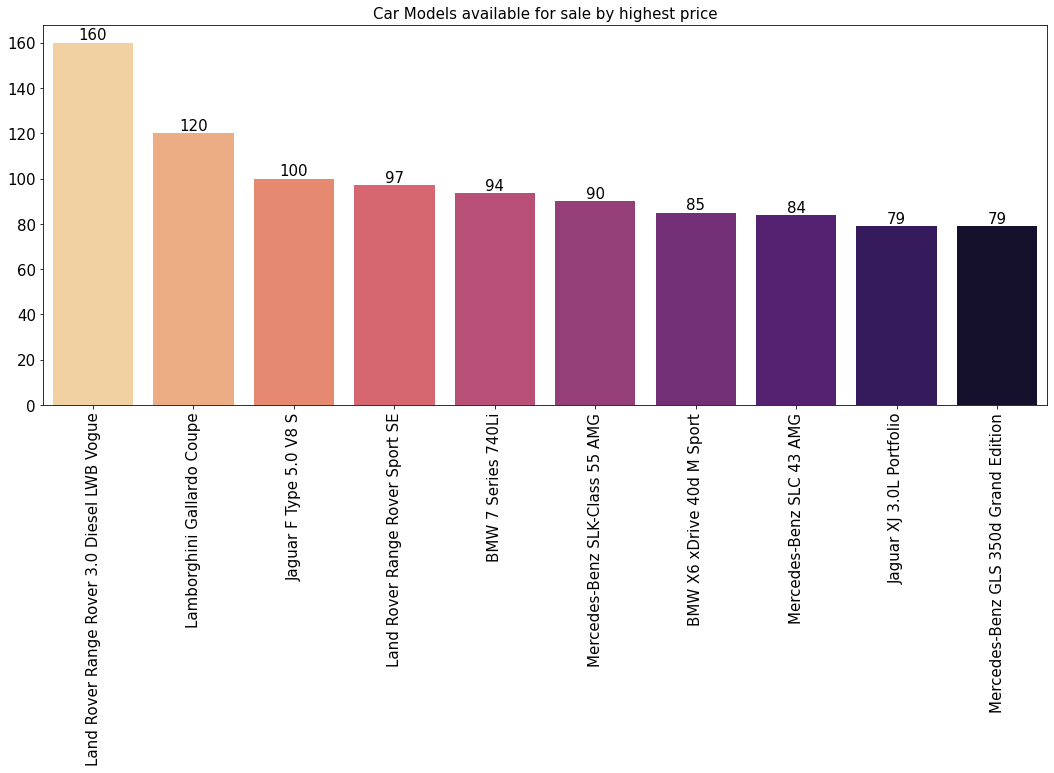

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Car Model", y = "Price", data = cp, palette = "magma_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Car Models available for sale by highest price", size = 15)
plt.xticks(size = 15, rotation =90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **ใน รัฐ แสดงจำนวนรถปีที่มีขายเยอะที่สุด**

In [ ]:
ly = used_cars.groupby(["Year", "Location"])["Location"].agg(["count"]).sort_values(by = "count", ascending = False ).reset_index()
ly = ly.drop_duplicates("Location", keep = "first")
ly.columns = ["Year", "Location", "Cars"]
ly

,Year,Location,Cars
0,2017,Coimbatore,126
1,2014,Mumbai,115
2,2017,Kochi,114
8,2014,Delhi,99
9,2014,Kolkata,90
10,2012,Hyderabad,89
21,2012,Pune,78
26,2014,Bangalore,72
30,2016,Chennai,66
45,2015,Jaipur,54


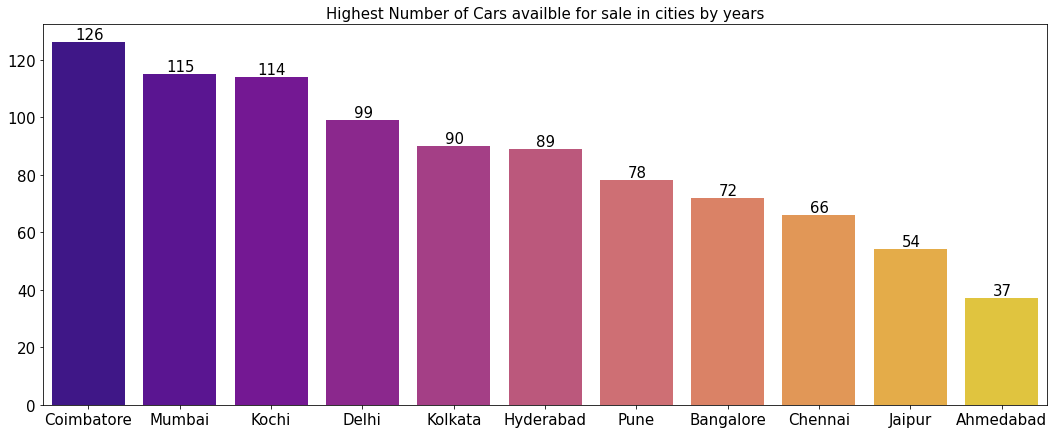

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Location", y = "Cars", data = ly, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Highest Number of Cars availble for sale in cities by years", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงรถวิ่งน้อยที่วางขายในรัฐ**

In [ ]:
cc = used_cars.groupby("Location")["Kilometers_Driven"].agg(["sum","count","min","mean","max"]).reset_index().sort_values(by = "sum")
cc.columns = ["city", "Total Drive km", "Cars", "Min Drive km", "Avg Drive km", "Max Drive km"]
cc

,city,Total Drive km,Cars,Min Drive km,Avg Drive km,Max Drive km
0,Ahmedabad,12371486,224,1000,55229.848214,173000
1,Bangalore,20925339,358,1331,58450.667598,445000
8,Kolkata,23311825,535,1000,43573.504673,775000
7,Kochi,29194732,651,3102,44845.978495,169006
6,Jaipur,29588897,413,1000,71643.818402,300000
3,Coimbatore,29906148,636,2526,47022.245283,186679
4,Delhi,31753404,554,1000,57316.613718,231673
9,Mumbai,35702626,790,171,45193.197468,262000
10,Pune,43885210,622,1000,70555.000000,282000
2,Chennai,44447151,494,3000,89973.989879,6500000


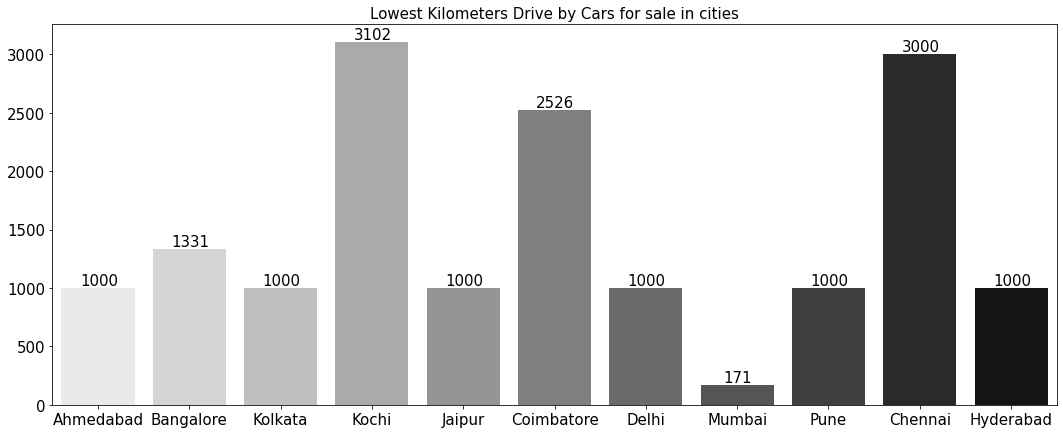

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "city", y = "Min Drive km", data = cc, palette = "gist_yarg")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Lowest Kilometers Drive by Cars for sale in cities", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **ประเภทเชื้อเพลิงกับรัฐแสดงจำนวนรถ**

In [ ]:
fc = used_cars.groupby(["Location", "Fuel_Type"])["Fuel_Type"].agg(["count"]).sort_values(by = "count", ascending = False ).reset_index()
fc = fc.drop_duplicates("Location", keep="first")
fc.columns = ["city", "Fuel", "Cars"]
fc

,city,Fuel,Cars
0,Hyderabad,Diesel,506
1,Mumbai,Petrol,458
2,Coimbatore,Diesel,356
3,Kochi,Petrol,339
4,Pune,Petrol,320
6,Delhi,Diesel,306
8,Chennai,Diesel,289
11,Kolkata,Petrol,279
14,Jaipur,Diesel,230
16,Bangalore,Diesel,219


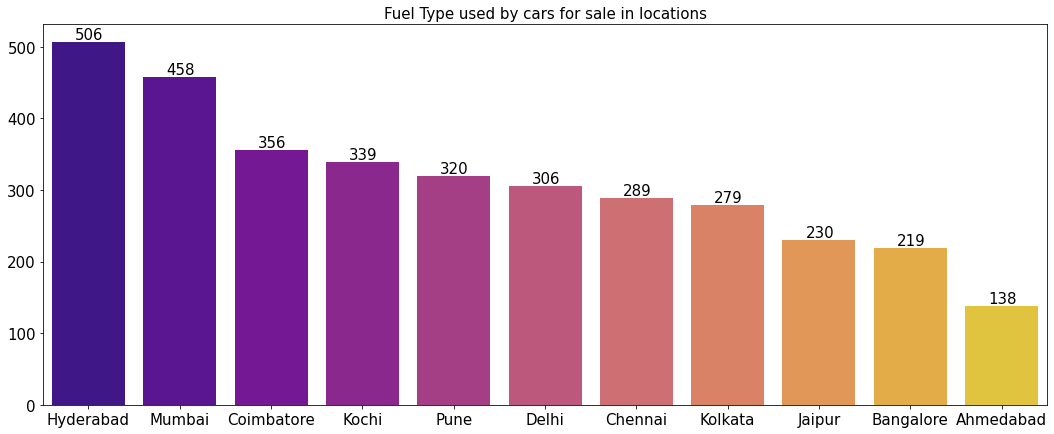

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "city", y = "Cars", data = fc, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Fuel Type used by cars for sale in locations", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถมือแต่ล่ะระดับที่มีเยอะในรัฐ**

In [ ]:
cl = used_cars.groupby(["Location", "Owner_Type"])["Owner_Type"].agg(["count"]).sort_values(by = "count", ascending = False ).reset_index()
cl = cl.drop_duplicates("Owner_Type", keep="first")
cl.columns = ["city", "Owner_Type", "Cars"]
cl

,city,Owner_Type,Cars
0,Hyderabad,First,658
11,Pune,Second,170
20,Chennai,Third,36
29,Mumbai,Fourth & Above,2


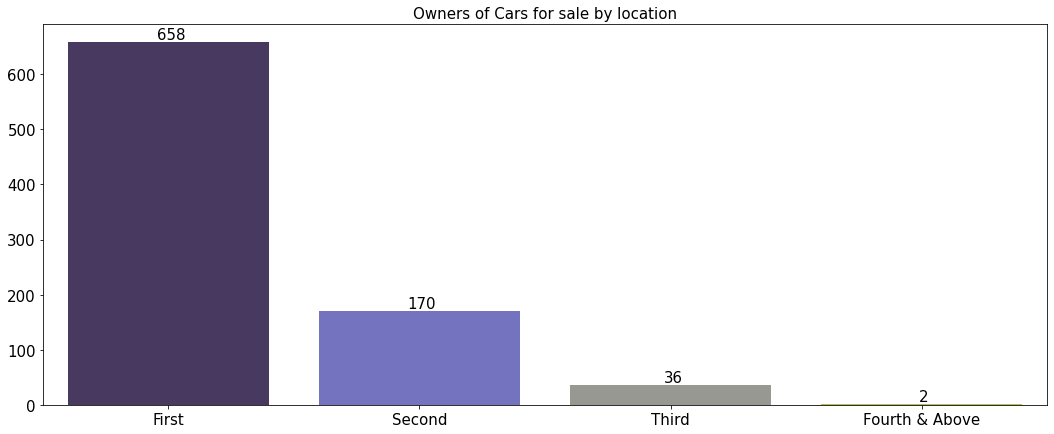

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner_Type", y = "Cars", data = cl, palette = "gist_stern")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Owners of Cars for sale by location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **แสดงจำนวนรถทีขายแต่ละเมือง แต่ละประเภทเกียร์**

In [ ]:
lt = used_cars.groupby(["Location", "Transmission"])["Transmission"].agg(["count"]).sort_values(by = "count", ascending = False ).reset_index()
lt.columns = ["City", "Transmission", "Cars"]
lt

,City,Transmission,Cars
0,Hyderabad,Manual,546
1,Mumbai,Manual,487
2,Pune,Manual,478
3,Kolkata,Manual,455
4,Kochi,Manual,446
5,Coimbatore,Manual,389
6,Delhi,Manual,383
7,Chennai,Manual,374
8,Jaipur,Manual,361
9,Mumbai,Automatic,303


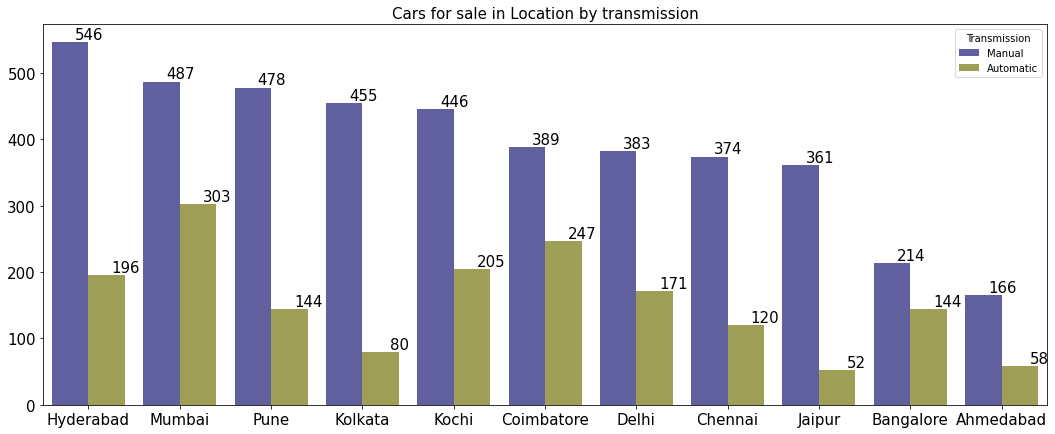

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Cars", hue = "Transmission", data = lt, palette = "gist_stern")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.41, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale in Location by transmission", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Cars for sale (Mileage kmpl/kg) by Location**

In [ ]:
ml = used_cars.groupby(["Location"])["Mileage kmpl/kg"].agg(["sum", "mean", "max"]).reset_index().sort_values(by = "sum")
ml.columns = ["City", "Total Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
ml

,City,Total Mileage kmpl/kg,Avg Mileage kmpl/kg,Max Mileage kmpl/kg
0,Ahmedabad,4216.60,18.824107,28.40
1,Bangalore,5987.46,16.724749,28.09
6,Jaipur,7845.58,18.996562,28.40
2,Chennai,8882.20,18.016633,28.40
4,Delhi,9918.94,17.904224,33.54
8,Kolkata,10242.37,19.144617,28.40
10,Pune,11156.89,17.937122,33.54
3,Coimbatore,11324.67,17.806085,28.40
7,Kochi,12135.61,18.641490,33.44
9,Mumbai,13693.66,17.355716,33.54


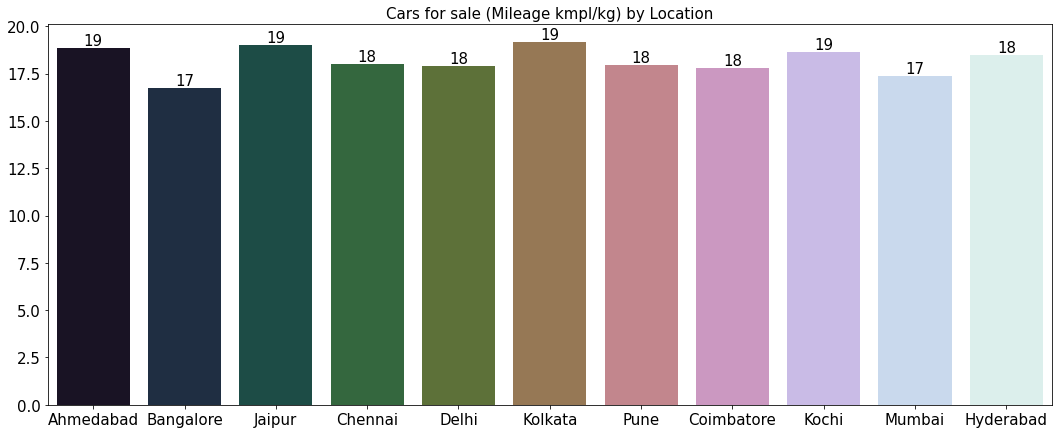

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Avg Mileage kmpl/kg", data = ml, palette = "cubehelix")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale (Mileage kmpl/kg) by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Cars for sale (Engine CC) by Location**

In [ ]:
el = used_cars.groupby(["Location"])["Engine CC"].agg(["min", "max"]).reset_index().sort_values(by = "max",ascending = False)
el.columns = ["City", "Min Engine CC", "Max Engine CC"]
el

,City,Min Engine CC,Max Engine CC
5,Hyderabad,624.0,5998.0
1,Bangalore,624.0,5461.0
8,Kolkata,793.0,5461.0
4,Delhi,796.0,5204.0
3,Coimbatore,624.0,5000.0
7,Kochi,624.0,4951.0
9,Mumbai,796.0,4806.0
10,Pune,624.0,3498.0
2,Chennai,72.0,3200.0
6,Jaipur,624.0,3198.0


In [ ]:
el = el.melt("City", var_name = "Engine CC", value_name = "Size")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Size", hue = "Engine CC", data = el, palette = "gist_stern")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale (Engine CC) by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


TypeError: ignored

<Figure size 1296x504 with 0 Axes>

# **Cars for sale (Power bph) by Location**

In [ ]:
pl = used_cars.groupby("Location")["Power bph"].agg(["min","max" ]).reset_index().sort_values(by = "max",ascending = False)
pl.columns = ["Location", "Min Power bph", "Max Power bph"]
pl

,Location,Min Power bph,Max Power bph
4,Delhi,38.40,560.00
5,Hyderabad,34.20,552.00
9,Mumbai,34.20,550.00
3,Coimbatore,34.20,503.00
7,Kochi,34.20,450.00
1,Bangalore,37.48,421.00
8,Kolkata,34.20,387.30
10,Pune,35.00,321.00
0,Ahmedabad,37.50,308.43
2,Chennai,35.50,308.43


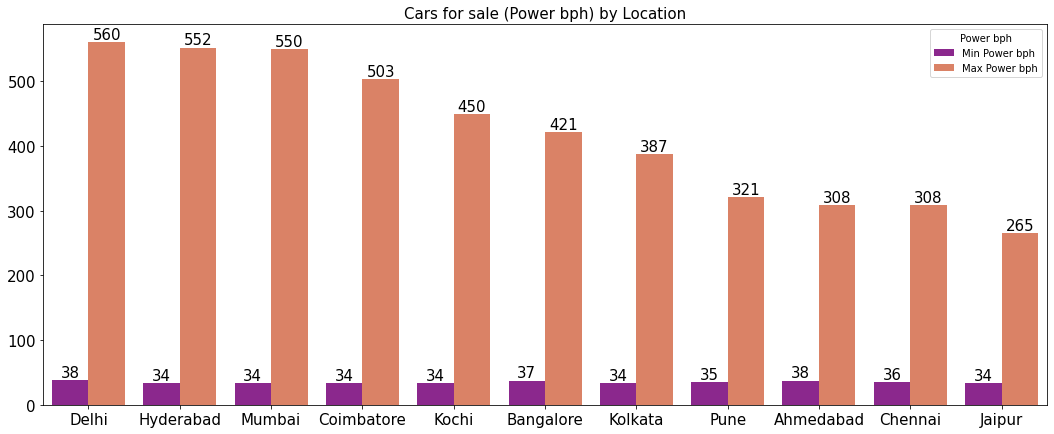

In [ ]:
pl = pl.melt("Location", var_name = "Power bph", value_name = "Size")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Location", y = "Size", hue = "Power bph", data = pl, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale (Power bph) by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale (Seat) by Location

In [ ]:
sl = used_cars.groupby("Location")["Seats"].agg(["min","max" ]).reset_index().sort_values(by = "max",ascending = False)
sl.columns = ["City", "Min Seats", "Max Seats"]
sl

,City,Min Seats,Max Seats
1,Bangalore,2.0,10.0
5,Hyderabad,0.0,10.0
9,Mumbai,2.0,10.0
10,Pune,2.0,10.0
2,Chennai,4.0,9.0
8,Kolkata,2.0,9.0
0,Ahmedabad,4.0,8.0
3,Coimbatore,2.0,8.0
4,Delhi,2.0,8.0
6,Jaipur,4.0,8.0


In [ ]:
sl = sl.melt("City", var_name = "Seats", value_name = "Count")

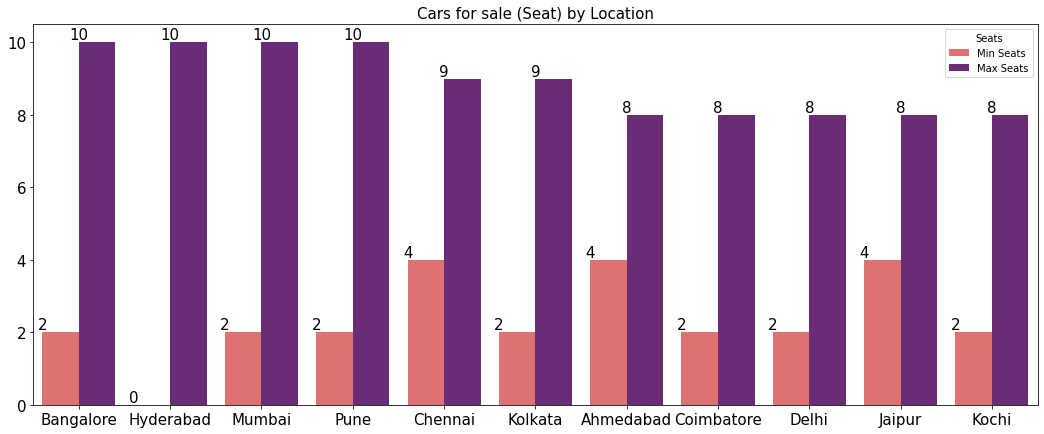

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Count", hue = "Seats", data = sl, palette = "magma_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x(), p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale (Seat) by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Cars for sale highest price by Location**

In [ ]:
pl = used_cars.groupby(["Location"])["Price"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "max", ascending = False)
pl.columns = ["City", "Total Worth", "Min Price", "Avg Price", "Max Price"]
pl

,City,Total Worth,Min Price,Avg Price,Max Price
5,Hyderabad,7254.20,0.60,9.776550,160.00
4,Delhi,5378.08,0.75,9.707726,120.00
7,Kochi,7277.65,1.26,11.179186,97.07
3,Coimbatore,9589.75,1.68,15.078223,93.67
1,Bangalore,4771.65,1.35,13.328631,93.00
0,Ahmedabad,1894.44,0.75,8.457321,85.00
8,Kolkata,3028.75,0.65,5.661215,75.00
9,Mumbai,7449.17,0.55,9.429329,75.00
2,Chennai,3830.29,0.65,7.753623,70.00
10,Pune,4183.73,0.44,6.726254,68.00


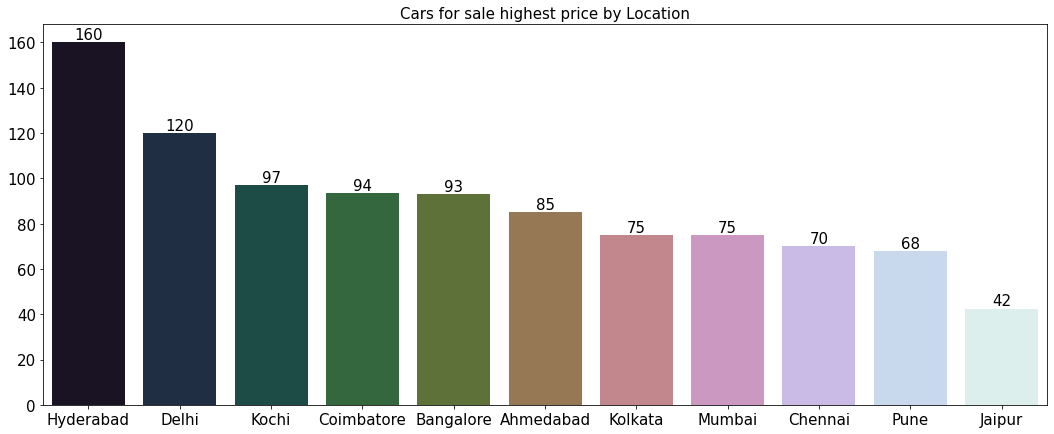

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Max Price", data = pl, palette = "cubehelix")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale highest price by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Kilometers drive by cars for sale related to Fuel Type**

In [ ]:
kf = used_cars.groupby(["Fuel_Type"])["Kilometers_Driven"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "max", ascending = False)
kf.columns = ["Fuel Type", "Total Drive(km)", "Min Drive(km)", "Avg Drive(km)", "Max Drive(km)"]
kf

,Fuel Type,Total Drive(km),Min Drive(km),Avg Drive(km),Max Drive(km)
1,Diesel,216880619,1000,67669.459906,6500000
4,Petrol,132867051,171,48385.670430,620000
0,CNG,3104979,10600,55446.053571,100000
3,LPG,599662,17000,59966.200000,75000
2,Electric,94000,44000,47000.000000,50000


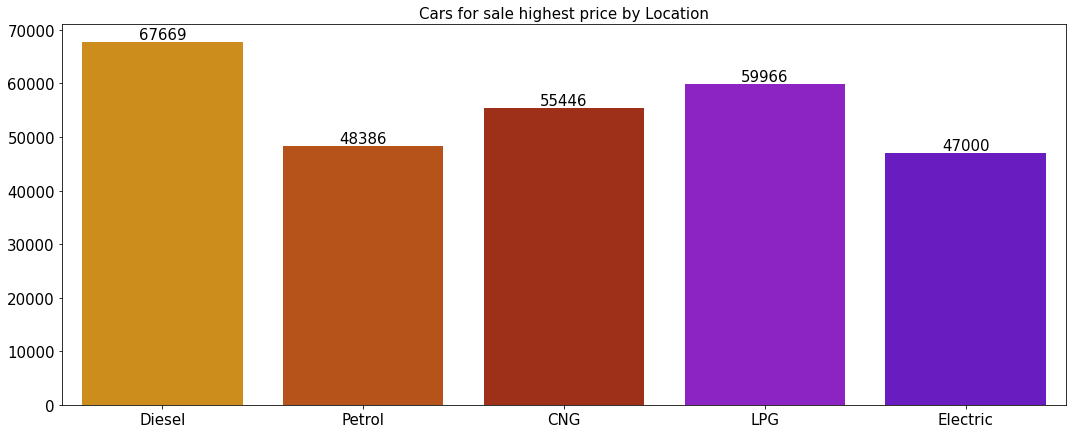

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel Type", y = "Avg Drive(km)", data = kf, palette = "gnuplot_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()) ,(p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black', size =15)
plt.title("Cars for sale highest price by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **ประเภทของเชื้อเพลิงรถที่ขายได้ในแต่ละปี**

In [ ]:
fy = used_cars.groupby(["Fuel_Type", "Year"])["Fuel_Type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
fy = fy.drop_duplicates("Fuel_Type",keep = "first")
fy.columns = ["Year", "Fuel", "Cars"]
fy

,Year,Fuel,Cars
27,Diesel,2014,490
59,Petrol,2016,331
6,CNG,2014,11
39,LPG,2012,4
33,Electric,2011,1


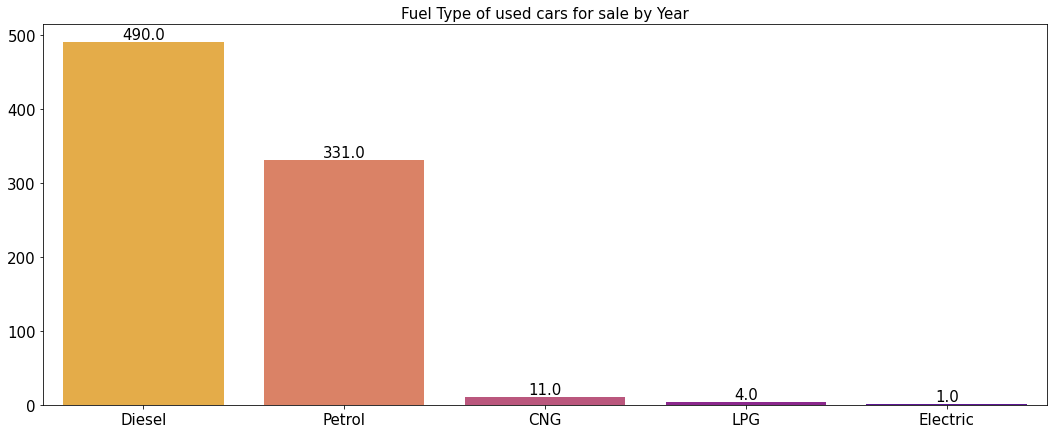

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Year", y = "Cars", data = fy, palette = "plasma_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of used cars for sale by Year", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **จำนวนรถประเภทของเชื้อเพลิง ประเภทของเกียร์**

In [ ]:
ft = used_cars.groupby(["Fuel_Type", "Transmission"])["Transmission"].agg(["count"]).reset_index()
ft.columns = ["Fuel", "Transmission", "Cars"]
ft

,Fuel,Transmission,Cars
0,CNG,Manual,56
1,Diesel,Automatic,1108
2,Diesel,Manual,2097
3,Electric,Automatic,2
4,LPG,Manual,10
5,Petrol,Automatic,610
6,Petrol,Manual,2136


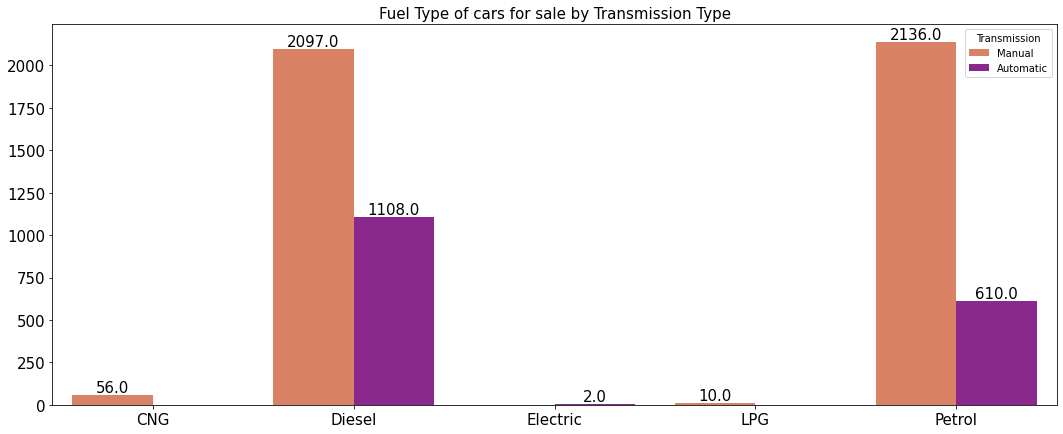

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel", y = "Cars", hue = "Transmission",data = ft, palette = "plasma_r")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.2,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of cars for sale by Transmission Type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **จำนวนประเภทของเชิ้อเพลิงกับประเภทการขาย**

In [ ]:
fo = used_cars.groupby(["Fuel_Type", "Owner_Type"])[ "Owner_Type"].agg(["count"]).reset_index().sort_values(by ="count",ascending = False)
fo

,Fuel_Type,Owner_Type,count
3,Diesel,First,2670
10,Petrol,First,2204
5,Diesel,Second,487
12,Petrol,Second,469
13,Petrol,Third,69
0,CNG,First,45
6,Diesel,Third,43
1,CNG,Second,10
8,LPG,First,8
4,Diesel,Fourth & Above,5


## **Fuel Type of cars for sale by mileage kmpl/kg**

In [ ]:
fm = used_cars.groupby("Fuel_Type")["Mileage kmpl/kg"].agg(["min", "mean", "max"]).reset_index()
fm.columns = ["Fuel", "Min Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
fm = fm.dropna()
fm

,Fuel,Min Mileage kmpl/kg,Avg Mileage kmpl/kg,Max Mileage kmpl/kg
0,CNG,13.20,25.418036,33.54
1,Diesel,0.00,18.620484,28.40
3,LPG,13.45,19.385000,26.20
4,Petrol,0.00,17.415204,26.00


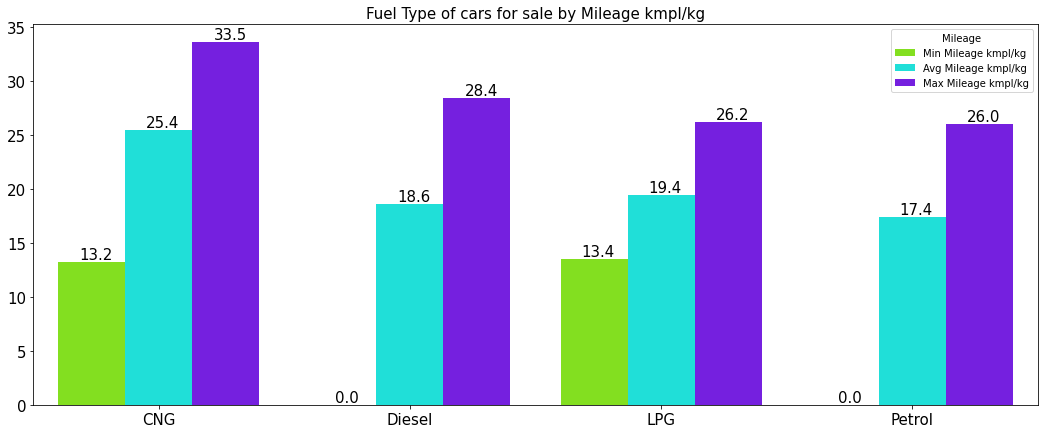

In [ ]:
fm = fm.melt("Fuel", var_name = "Mileage", value_name = "kmpl/kg")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel", y = "kmpl/kg", hue = "Mileage",data = fm, palette = "hsv")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.15,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of cars for sale by Mileage kmpl/kg", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Fuel Type of cars for sale by Engine CC**

In [ ]:
fe = used_cars.groupby("Fuel_Type")["Engine CC"].agg(["min", "mean", "max"]).reset_index()
fe.columns = ["Fuel", "Min Engine CC", "Avg Engine CC", "Max Engine CC"]
fe

,Fuel,Min Engine CC,Avg Engine CC,Max Engine CC
0,CNG,796.0,1091.053571,1798.0
1,Diesel,793.0,1860.989263,4806.0
2,Electric,72.0,935.000000,1798.0
3,LPG,814.0,1027.400000,1086.0
4,Petrol,624.0,1354.908979,5998.0


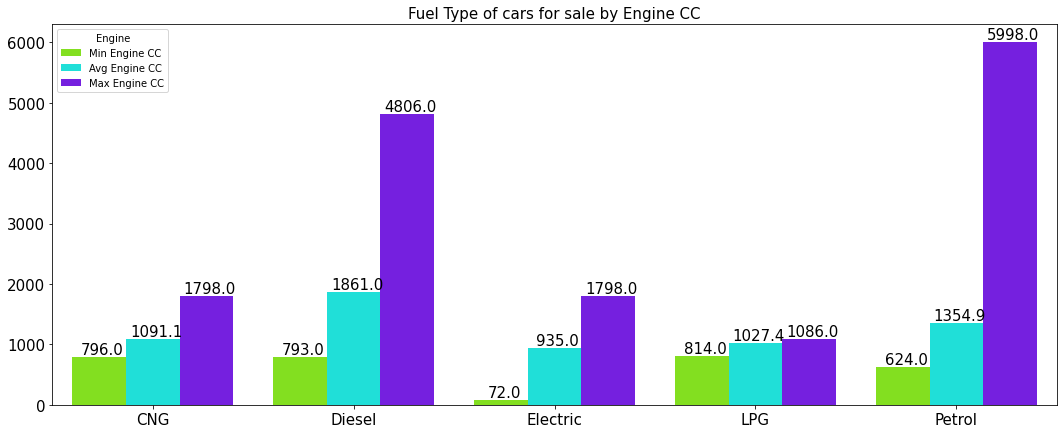

In [ ]:
fe = fe.melt("Fuel", var_name = "Engine", value_name = "CC")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel", y = "CC", hue = "Engine",data = fe, palette = "hsv")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.15,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Fuel Type of cars for sale by Power bph**

In [ ]:
fp = used_cars.groupby("Fuel_Type")["Power bph"].agg(["min", "mean", "max"]).reset_index()
fp.columns = ["Fuel", "Min Power bph", "Avg Power bph", "Max Power bph"]
fp

,Fuel,Min Power bph,Avg Power bph,Max Power bph
0,CNG,38.4,65.686879,138.00
1,Diesel,35.5,127.657520,394.30
2,Electric,41.0,57.000000,73.00
3,LPG,55.2,59.915000,68.05
4,Petrol,34.2,97.620677,560.00


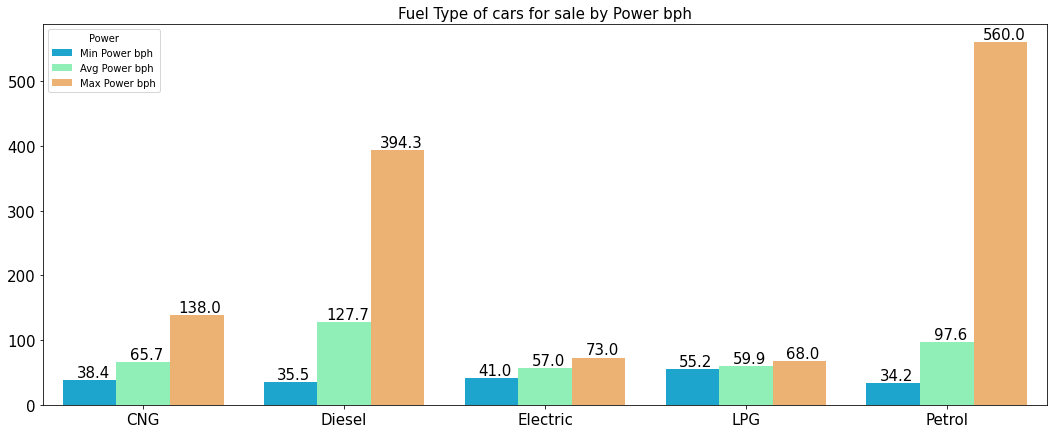

In [ ]:
fp = fp.melt("Fuel", var_name = "Power", value_name = "bph")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel", y = "bph", hue = "Power",data = fp, palette = "rainbow")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.15,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of cars for sale by Power bph", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Fuel Type of cars for sale by Price**

In [ ]:
fsp = used_cars.groupby("Fuel_Type")["Price"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
fsp.columns = ["Fuel", "cars", "Total Price", "Min Price", "Avg Price","Max Price"]
fsp

,Fuel,cars,Total Price,Min Price,Avg Price,Max Price
0,CNG,56,196.94,1.20,3.516786,8.35
1,Diesel,3205,41154.14,0.60,12.840605,160.00
2,Electric,2,25.75,12.75,12.875000,13.00
3,LPG,10,24.87,1.45,2.487000,3.20
4,Petrol,2746,15655.22,0.44,5.701100,120.00


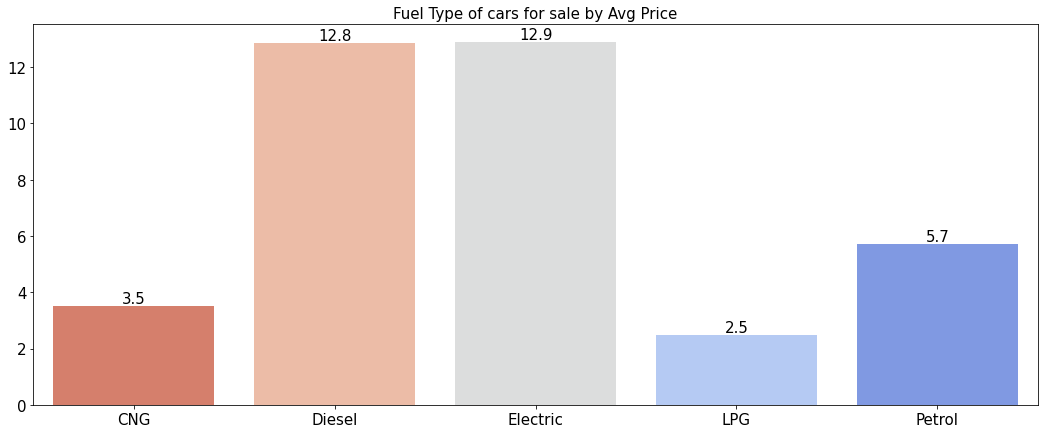

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Fuel", y = "Avg Price",data = fsp, palette = "coolwarm_r")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.4,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Fuel Type of cars for sale by Avg Price", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Tranmission Type of cars for sale by year**

In [ ]:
ty = used_cars.groupby(["Year","Transmission"])["Transmission"].agg(["count"]).reset_index()
ty.columns = ["Year", "Transmission", "Cars"]
ty.sort_values(by = "Cars")

,Year,Transmission,Cars
0,1998,Automatic,1
2,1999,Manual,2
6,2003,Automatic,2
1,1998,Manual,3
3,2000,Manual,4
8,2004,Automatic,6
4,2001,Manual,8
10,2005,Automatic,9
12,2006,Automatic,11
5,2002,Manual,15


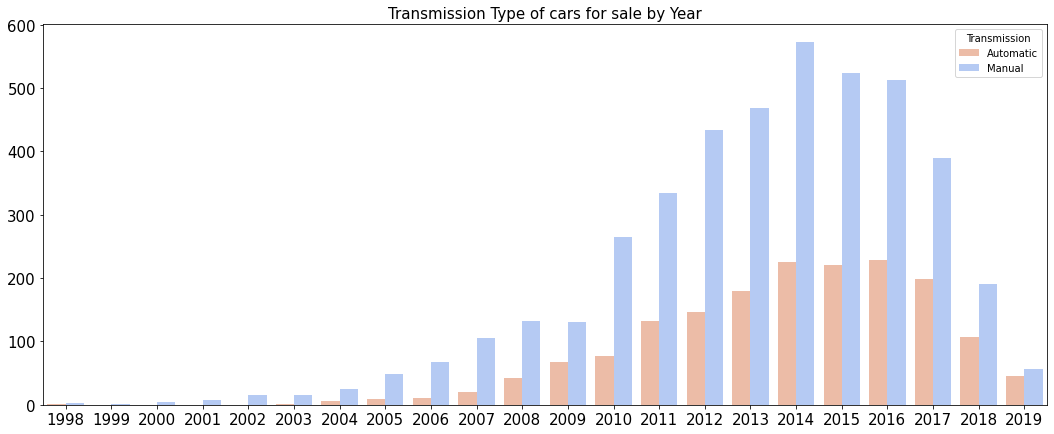

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Year", y = "Cars", hue = "Transmission",data = ty, palette = "coolwarm_r")
plt.title("Transmission Type of cars for sale by Year", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Transmission Type of cars for sale by kilometers_Driven**

In [ ]:
td = used_cars.groupby("Transmission")["Kilometers_Driven"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
td.columns = ["Transmission", "cars", "Total Drive(km)", "Min  Drive(km)", "Avg Drive(km)","Max  Drive(km)"]
td

,Transmission,cars,Total Drive(km),Min Drive(km),Avg Drive(km),Max Drive(km)
0,Automatic,1720,94661515,600,55035.764535,6500000
1,Manual,4299,258884796,171,60219.771110,720000


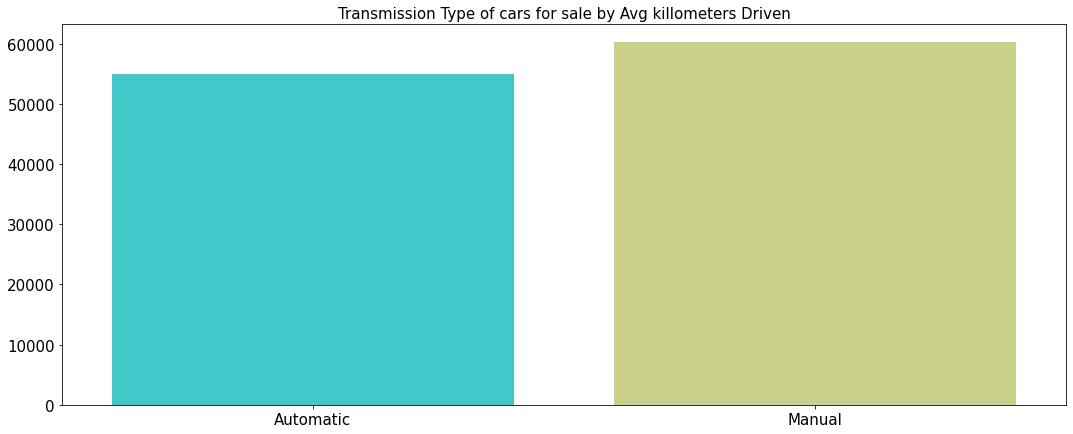

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Transmission", y = "Avg Drive(km)", data = td, palette = "rainbow")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.4,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Avg killometers Driven", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Transmission Type of cars for sale by owner_Type**

In [ ]:
co = used_cars.groupby(["Transmission", "Owner_Type"])["Owner_Type"].agg(["count"]).reset_index()
co

,Transmission,Owner_Type,count
0,Automatic,First,1409
1,Automatic,Fourth & Above,1
2,Automatic,Second,285
3,Automatic,Third,25
4,Manual,First,3520
5,Manual,Fourth & Above,8
6,Manual,Second,683
7,Manual,Third,88


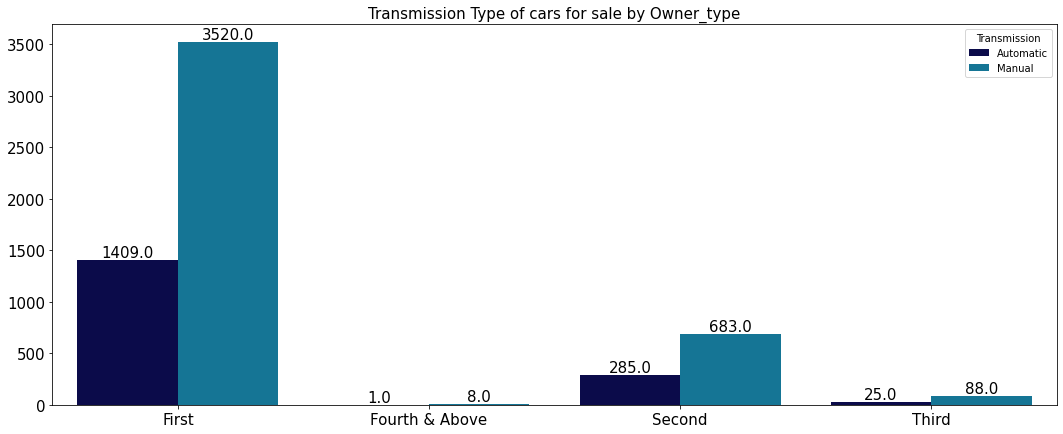

In [ ]:
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Owner_Type", y = "count", hue="Transmission",data = co, palette = "ocean")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.2,p.get_height()),
                                ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Owner_type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel (None)
plt.show()

## **Transmission Type of cars for sale by Mileage kmpl/kg**

In [ ]:
tm = used_cars.groupby("Transmission")["Mileage kmpl/kg"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
tm.columns = ["Transmission","Cars","Total Mileage kmpl/kg","Min Mileage kmpl/kg","Avg Mileage kmpl/kg","Max Mileage kmpl/kg"]
tm

,Transmission,Cars,Total Mileage kmpl/kg,Min Mileage kmpl/kg,Avg Mileage kmpl/kg,Max Mileage kmpl/kg
0,Automatic,1718,27006.40,0.0,15.719674,28.40
1,Manual,4299,82111.66,0.0,19.100177,33.54


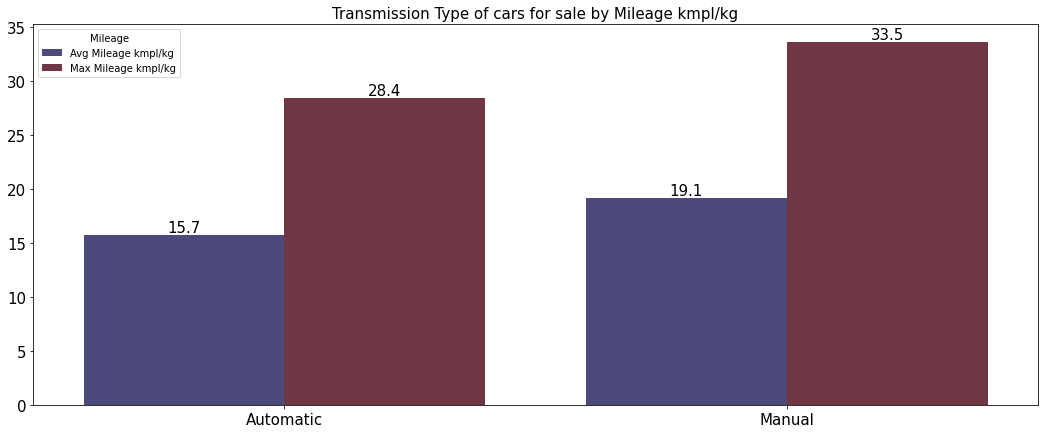

In [ ]:
tm = tm[["Transmission", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]]
tm = tm.melt("Transmission" ,var_name = "Mileage" ,value_name = "kmpl/kg" )
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Transmission", y = "kmpl/kg", hue = "Mileage", data = tm, palette="icefire")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.2, p.get_height()),
                                ha='center', va='bottom',color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Mileage kmpl/kg", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **Transmission Type of cars for sale by Engine CC**

In [ ]:
te = used_cars.groupby("Transmission")["Engine CC"].agg(["count", "min", "max"]).reset_index()
te.columns = ["Transmission", "cars", "Min Engine CC", "Max Engine CC"]
te

,Transmission,cars,Min Engine CC,Max Engine CC
0,Automatic,1720,72.0,5998.0
1,Manual,4299,624.0,3436.0


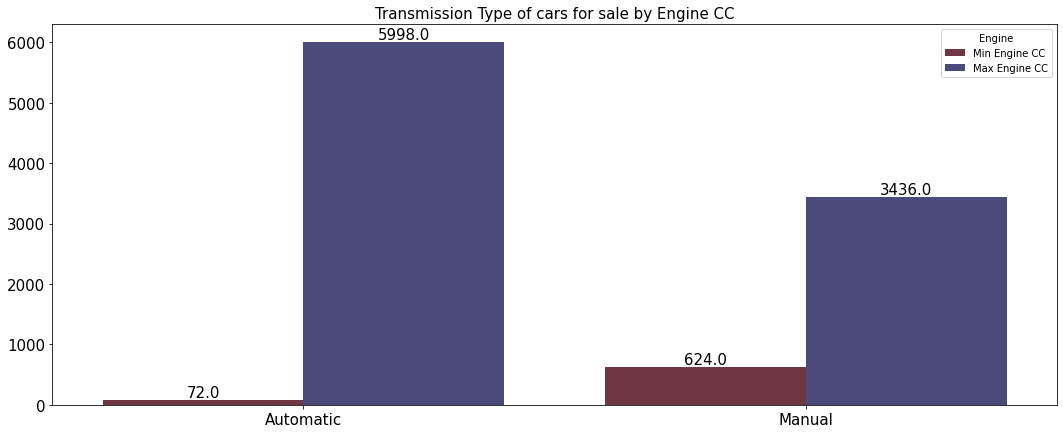

In [ ]:
te = te[["Transmission", "Min Engine CC","Max Engine CC"]]
te = te.melt("Transmission", var_name = "Engine", value_name = "CC")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Transmission", y = "CC", hue = "Engine", data = te, palette="icefire_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **Transmission Type of cars for sale by Power bph**

In [ ]:
tp = used_cars.groupby("Transmission")["Power bph"].agg(["count", "min","mean", "max"]).reset_index()
tp.columns = ["Transmission", "cars", "Min Power bph", "Avg Power bph","Max Power bph"]
tp

,Transmission,cars,Min Power bph,Avg Power bph,Max Power bph
0,Automatic,1720,37.48,167.005775,560.0
1,Manual,4299,34.20,91.730731,210.0


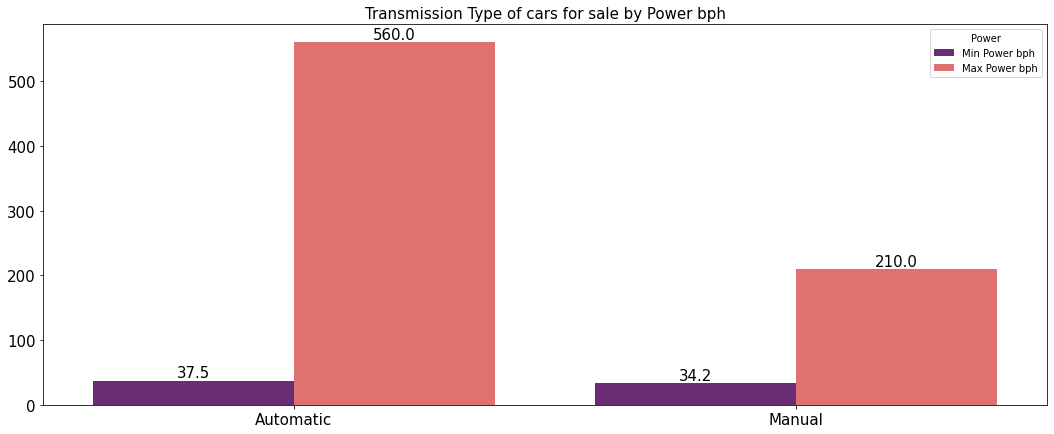

In [ ]:
tp = tp[["Transmission", "Min Power bph","Max Power bph"]]
tp = tp.melt("Transmission", var_name = "Power", value_name = "bph")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Transmission", y = "bph", hue = "Power", data = tp, palette="magma")
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.2, p.get_height()),
                                ha='center', va='bottom',color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Power bph", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## **Transmission Type of cars for sale by Seats**

In [ ]:
ts = used_cars.groupby("Transmission")["Seats"].agg(["count", "sum","min","mean", "max"]).reset_index()
ts.columns = ["Transmission", "cars","Total Seats", "Min Seats", "Avg Seats","Max Seats"]
ts

,Transmission,cars,Total Seats,Min Seats,Avg Seats,Max Seats
0,Automatic,1720,8914.517500,0.0,5.182859,8.0
1,Manual,4299,22858.230833,2.0,5.317104,10.0


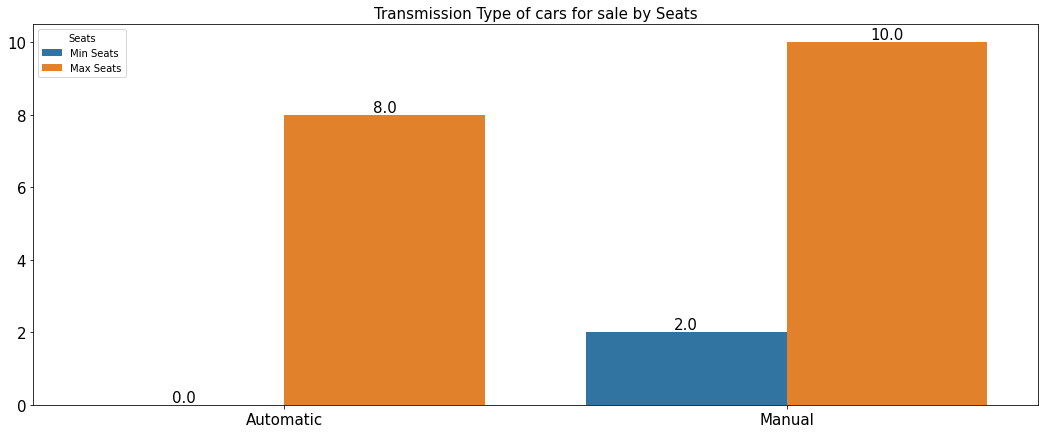

In [ ]:
ts = ts[["Transmission", "Min Seats","Max Seats"]]
ts = ts.melt("Transmission", var_name = "Seats", value_name = "count")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Transmission", y = "count", hue = "Seats", data = ts)
for p in graph.patches:
          graph.annotate('{:.01f}'.format(p.get_height()),
                                (p.get_x()+0.2, p.get_height()),
                                ha='center', va='bottom',color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Seats", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Tranmission Type of cars for sale by Price**

In [ ]:
tp = used_cars.groupby("Transmission")["Price"].agg(["count", "sum","min","mean", "max"]).reset_index()
tp.columns = ["Transmission", "cars","Total Price", "Min Price", "Avg Price","Max Price"]
tp

,Transmission,cars,Total Price,Min Price,Avg Price,Max Price
0,Automatic,1720,34131.63,1.50,19.843971,160.00
1,Manual,4299,22925.29,0.44,5.332703,40.88


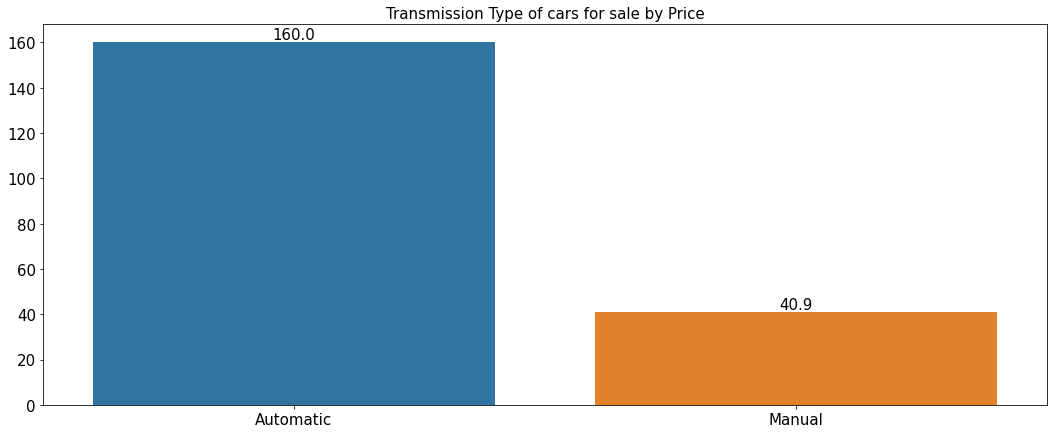

In [ ]:
plt.figure(figsize= (18,7))
graph = sns.barplot(x = "Transmission", y = "Max Price", data = tp)
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                      ha='center', va='bottom',color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Price", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Year**

In [ ]:
oy = used_cars.groupby(["Owner_Type", "Year"])["Year"].agg(["count"]).reset_index()
oy.columns = ["Owner", "Year", "Cars"]
oy.sort_values(by = "Cars")

,Owner,Year,Cars
0,First,1998,1
1,First,1999,1
30,Second,1999,1
29,Second,1998,1
28,Fourth & Above,2010,1
...,...,...,...
15,First,2013,528
19,First,2017,563
17,First,2015,661
16,First,2014,693


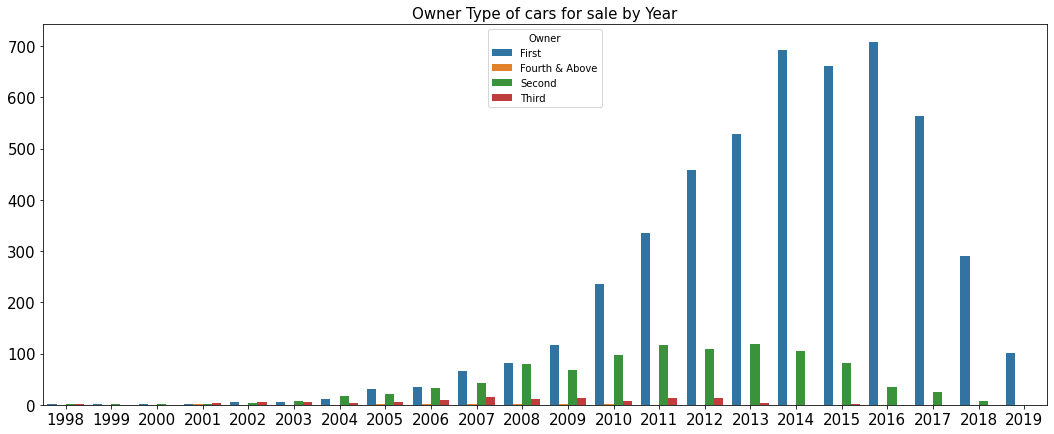

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Year", y = "Cars", hue = "Owner", data = oy)
plt.title("Owner Type of cars for sale by Year", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Kilometers Driven**

In [ ]:
ok = used_cars.groupby("Owner_Type")["Kilometers_Driven"].agg(["count", "sum", "min","mean","max"]).reset_index()
ok.columns = ["Owner", "Cars", "Total Drive(km)", "Min Drive(km)", "Avg Drive(km)", "Max Drive(km)"]
ok

,Owner,Cars,Total Drive(km),Min Drive(km),Avg Drive(km),Max Drive(km)
0,First,4929,272902869,171,55366.782106,6500000
1,Fourth & Above,9,1221833,59833,135759.222222,262000
2,Second,968,69399021,3000,71693.203512,250000
3,Third,113,10022588,6500,88695.469027,255000


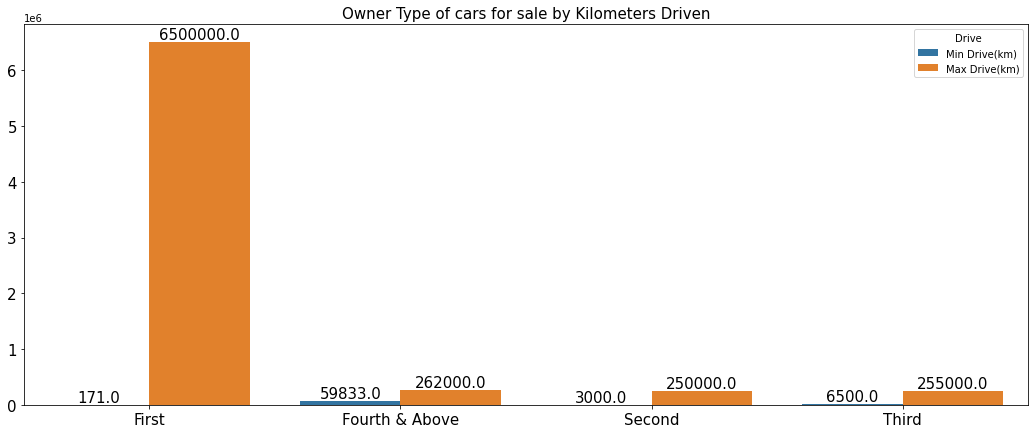

In [ ]:
ok = ok[["Owner", "Min Drive(km)","Max Drive(km)"]]
ok = ok.melt("Owner", var_name = "Drive", value_name = "km")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Owner", y = "km", hue = "Drive", data = ok)
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()),
                      (p.get_x()+0.2, p.get_height()),
                      ha='center', va='bottom',color= 'black', size = 15)
plt.title("Owner Type of cars for sale by Kilometers Driven", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Mileage kmpl/kg**

In [ ]:
om = used_cars.groupby("Owner_Type")["Mileage kmpl/kg"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
om.columns = ["Owner", "Cars", "Total Mileage kmpl/kg", "Min Mileage kmpl/kg","Avg Mileage kmpl/kg","Max Mileage kmpl/kg"]
om

,Owner,Cars,Total Mileage kmpl/kg,Min Mileage kmpl/kg,Avg Mileage kmpl/kg,Max Mileage kmpl/kg
0,First,4927,90959.35,0.0,18.461407,33.54
1,Fourth & Above,9,110.90,0.0,12.322222,17.80
2,Second,968,16313.52,0.0,16.852810,33.44
3,Third,113,1734.29,0.0,15.347699,28.40


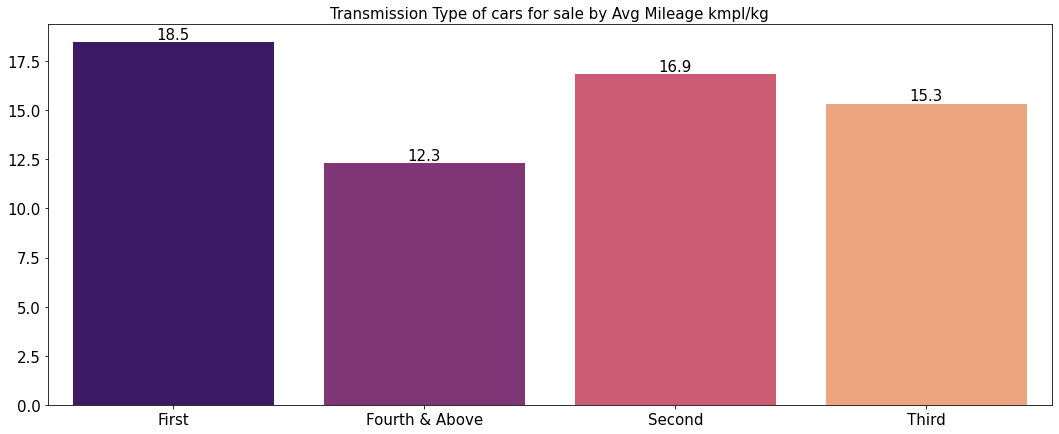

In [ ]:
plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Owner", y = "Avg Mileage kmpl/kg", data = om, palette="magma")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                      ha='center', va='bottom' ,color= 'black', size = 15)
plt.title("Transmission Type of cars for sale by Avg Mileage kmpl/kg", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Engine**

In [ ]:
oe = used_cars.groupby("Owner_Type")["Engine CC"].agg(["count", "min", "max"]).reset_index()
oe.columns = ["Owner", "Cars", "Min Engine CC", "Max Engine CC"]
oe

,Owner,Cars,Min Engine CC,Max Engine CC
0,First,4929,72.0,5998.0
1,Fourth & Above,9,1197.0,2499.0
2,Second,968,624.0,5461.0
3,Third,113,796.0,5204.0


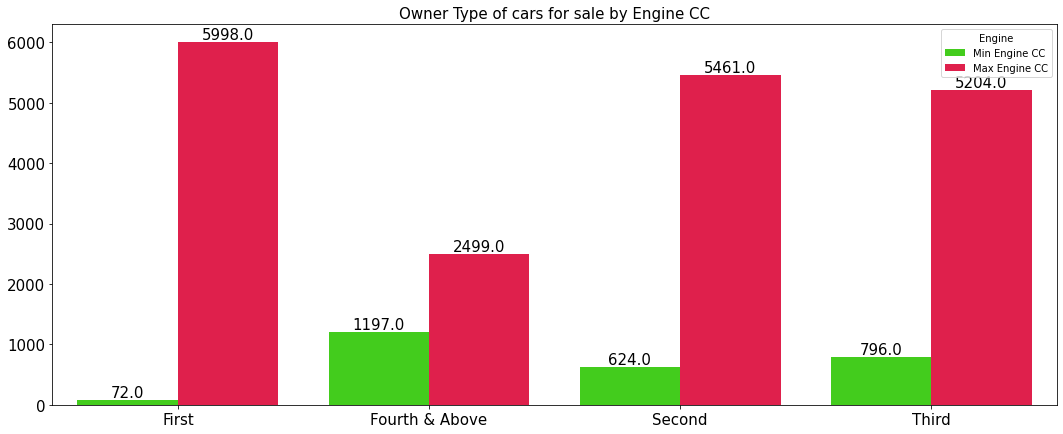

In [ ]:
oe = oe[["Owner", "Min Engine CC","Max Engine CC"]]
oe = oe.melt("Owner", var_name = "Engine", value_name = "CC")
plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Owner", y = "CC", hue = "Engine", data = oe, palette = "prism")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Owner Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Power bph**

In [ ]:
tp = used_cars.groupby("Owner_Type")["Power bph"].agg(["count", "min", "mean", "max"]).reset_index()
tp.columns =  ["Owner", "Cars", "Min Power bph", "Avg Power bph", "Max Power bph"]
tp

,Owner,Cars,Min Power bph,Avg Power bph,Max Power bph
0,First,4929,34.2,112.504616,552.0
1,Fourth & Above,9,70.0,106.781159,163.5
2,Second,968,35.0,116.902964,550.0
3,Third,113,35.0,114.530908,560.0


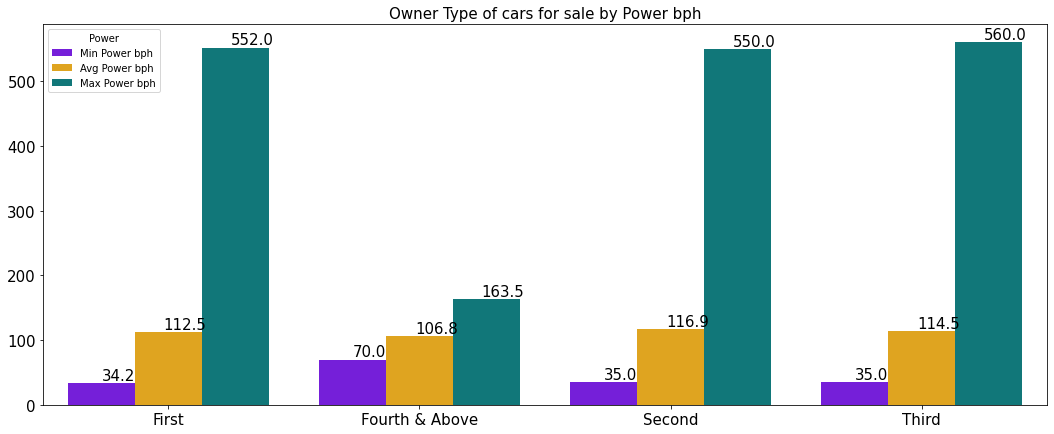

In [ ]:
tp = tp[["Owner", "Min Power bph","Avg Power bph", "Max Power bph"]]
tp = tp.melt("Owner", var_name = "Power", value_name = "bph")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Owner", y = "bph", hue = "Power", data = tp, palette = "prism_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Owner Type of cars for sale by Power bph", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Seats**

In [ ]:
os = used_cars.groupby("Owner_Type")["Seats"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
os.columns = ["Owner", "Cars", "Total Seats", "Min Seats", "Avg Seats", "Max Seats"]
os

,Owner,Cars,Total Seats,Min Seats,Avg Seats,Max Seats
0,First,4929,26011.713333,0.0,5.277280,10.0
1,Fourth & Above,9,55.279722,5.0,6.142191,8.0
2,Second,968,5101.195833,2.0,5.269830,10.0
3,Third,113,604.559444,2.0,5.350084,10.0


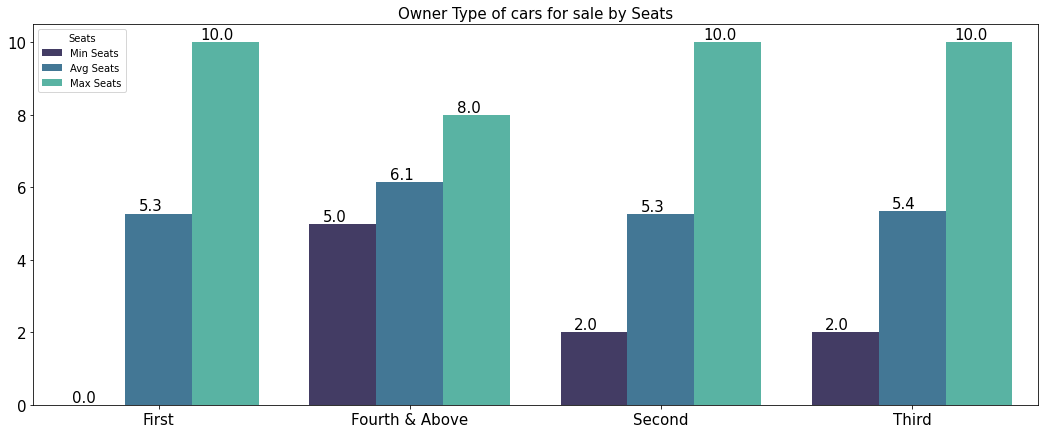

In [ ]:
os = os[["Owner", "Min Seats","Avg Seats", "Max Seats"]]
os = os.melt("Owner" , var_name = "Seats" , value_name = "count")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Owner", y = "count", hue = "Seats", data = os, palette = "mako")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Owner Type of cars for sale by Seats", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **Owner Type of cars for sale by Price**

In [ ]:
op = used_cars.groupby("Owner_Type")["Price"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
op.columns =  ["Owner", "Cars", "Total Price", "Min Price", "Avg Price", "Max Price"]
op

,Owner,Cars,Total Price,Min Price,Avg Price,Max Price
0,First,4929,49104.89,0.50,9.962445,160.0
1,Fourth & Above,9,29.52,1.97,3.280000,5.5
2,Second,968,7356.69,0.44,7.599886,90.0
3,Third,113,565.82,0.45,5.007257,120.0


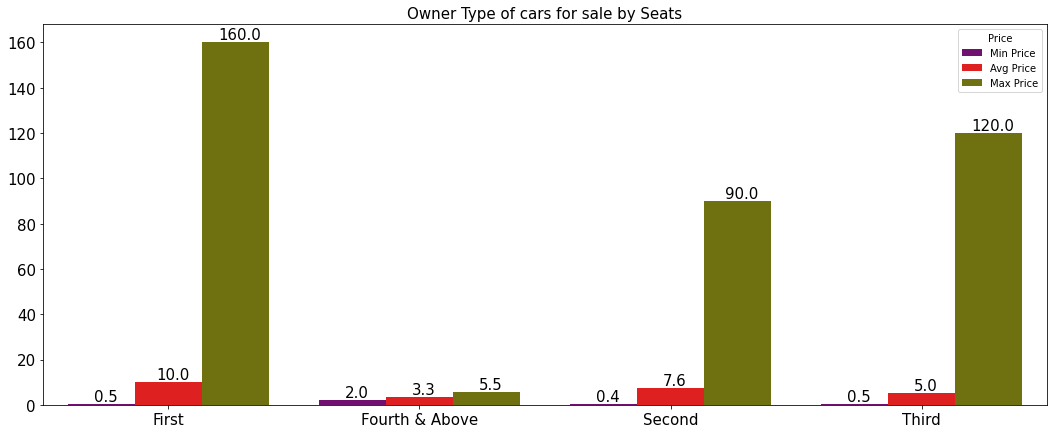

In [ ]:
op = op[["Owner" , "Min Price","Avg Price", "Max Price"]]
op = op. melt("Owner", var_name = "Price" , value_name = "Amount")
plt.figure(figsize=(18,7))
graph = sns.barplot(x = "Owner", y = "Amount", hue = "Price", data = op, palette = "brg")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),(p.get_x()+0.15, p.get_height()),ha='center', va='bottom',color= 'black', size = 15)
plt.title("Owner Type of cars for sale by Seats", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [206]:
data['Name'] = data['Name'].str.split(' ').str[0]

In [207]:
label = LabelEncoder()

In [208]:
data['Name'] = label.fit_transform(data['Name'])

In [209]:
data["Location"] = label.fit_transform(data["Location"])

In [210]:
data["Fuel_Type"] = label.fit_transform(data["Fuel_Type"])
data['Transmission']= label.fit_transform(data["Transmission"])
data["Owner_Type"]= label.fit_transform(data["Owner_Type"])

In [211]:
dt_num = data
imputer = SimpleImputer(strategy="median")
imputer.fit(dt_num)
X=imputer.transform(dt_num)
data = pd.DataFrame(X, columns=dt_num.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   float64
 1   Name               7253 non-null   float64
 2   Location           7253 non-null   float64
 3   Year               7253 non-null   float64
 4   Kilometers_Driven  7253 non-null   float64
 5   Fuel_Type          7253 non-null   float64
 6   Transmission       7253 non-null   float64
 7   Owner_Type         7253 non-null   float64
 8   Mileage            7253 non-null   float64
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  Price              7253 non-null   float64
dtypes: float64(13)
memory usage: 736.8 KB


In [229]:
X = data.drop(["S.No.","Price"],axis=1)
y = data["Price"]

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**linearRegression**

In [235]:
linear = LinearRegression()                                    
linear.fit(X_train, y_train)

pred = linear.predict(X_test)

cross_val = cross_val_score(linear ,X_train ,y_train ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

score: 0.573
Mean Absolute Error: 3.701603604446537
Mean Squared Error: 53.514268644103055
Root Mean Squared Error: 7.315344738568584


In [240]:
cross_val = cross_val_score(linear ,X_test ,y_test ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

score: 0.349


**RandomForestRegressor**

In [259]:
rf_reg = RandomForestRegressor(n_estimators = 500, random_state = 1)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

cross_val = cross_val_score(rf_reg ,X_train ,y_train ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

score: 0.707
Mean Absolute Error: 2.2424814517081817
Mean Squared Error: 21.927630417744208
Root Mean Squared Error: 4.682694781612849


In [260]:
cross_val = cross_val_score(rf_reg ,X_test ,y_test ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

score: 0.703


**GradientBoosting**

In [251]:
GDBT = GradientBoostingRegressor(random_state = 0)
GDBT.fit(X_train, y_train)
y_hat = GDBT.predict(X_test)

cross_val = cross_val_score(GDBT ,X_train ,y_train ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

score: 0.729
Mean Absolute Error: 2.245446397886515
Mean Squared Error: 21.16743332674469
Root Mean Squared Error: 4.600807899352535


In [252]:
cross_val = cross_val_score(GDBT ,X_test ,y_test ,cv=10)
print("score: {:.3f}".format(np.mean(cross_val)))

score: 0.718
